# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


In [66]:
# Parameters
m = 1

1

In [67]:
res=m;
N=2.0^m*500.0;#2.0^m*100.0;
Xf=1.0;

dx=Xf/N;
dt=round(dx*0.4,digits=10);
Nt=100.0*2^m*10
Tf=Nt*dt; #final time

println("the final time is ", Tf)

the final time is 0.8


In [68]:
print(N)

1000.0

In [69]:
println("dx =", dx)
println("dt =", dt)
println("dx/dt =", dx/dt)
println("epsilon <= dx/dt * (1/2)^(2*2-1) = ", dx/dt*(1/2)^(2*2-1))

println("epsilon = dx/dt * (1/2)^(2*2) = ", dx/dt*(1/2)^(2*2))

println("epsilon = dx/dt * (1/2)^(2*3) = ", dx/dt*(1/2)^(2*3))

println("epsilon = dx/dt * (1/2)^(2) = ", dx/dt*(1/2)^(2))

dx =0.001
dt =0.0004
dx/dt =2.5
epsilon <= dx/dt * (1/2)^(2*2-1) = 0.3125
epsilon = dx/dt * (1/2)^(2*2) = 0.15625
epsilon = dx/dt * (1/2)^(2*3) = 0.0390625
epsilon = dx/dt * (1/2)^(2) = 0.625


In [70]:
# Setting RESOLUTION

global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res$res"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1"

In [71]:
println(dx)
println(dt)

0.001
0.0004


In [72]:
epsilon=0.1##0.01#0.05; #05; #02;#0.05; #0.05; #0.05;#0.05;#0.05; #dissipation strength (-1 for backwards integration)

0.1

# Grid

In [73]:
ori=0.0;
initX1 = nothing
initX1=range(ori, stop=Xf, step=dx);

In [74]:
print(dx)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)

#T=range(dt,stop=Tf,step=dt)
T=range(0,stop=Tf-dt,step=dt)
println("the time step is ", dt)

0.001step size is  0.001
the time step is 0.0004


In [75]:
radius=zeros(L)
print(L)
print(size(initX1))
print(initX1[1001])
for i in 1:L
    radius[i]=initX[i]/(1-initX[i])
end


1007(1001,)1.0

In [76]:
include("./ScalarField.jl");

In [77]:
using Interpolations

# Initial data of m β Ψ and Ψ,x

In [78]:
using PyCall   


scipy = pyimport("scipy")
scipyinterpolate = pyimport("scipy.interpolate")


####

initphi=zeros(L);
initphibar=zeros(L);

#PHI,X

r0=0.7#0.3
sigma=0.3
A=0.1449
initphibar[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)



#PHI FROM PSI,X
spl = scipyinterpolate.splrep(initX[4:L-3], initphibar[4:L-3],k=5)
phi0=0
SFconstraint_phi(phi0,x) = scipyinterpolate.splev(x, spl)
initphi[4:L-3] = rungekutta4(SFconstraint_phi,phi0,initX1) 


#PHI
"initphi = init_gaussian(R,r0,sigma,A)"




"initphi = init_gaussian(R,r0,sigma,A)"

In [79]:
"""using Plots #showing initial data and the initial status of the horizon finder
plot(initX, [initphi initphibar], xaxis="x",title="Initial Data", labels=["init phi" "init phi,x"])"""

"using Plots #showing initial data and the initial status of the horizon finder\nplot(initX, [initphi initphibar], xaxis=\"x\",title=\"Initial Data\", labels=[\"init phi\" \"init phi,x\"])"

In [80]:
initm=zeros(L);
initbeta=zeros(L);
initpsi=zeros(L);
initpsibar=zeros(L);
state_array=[initm initbeta initpsi initpsibar initX];


#PSI
"initpsi = initphi .* initX ./ (1 .- initX)
initpsi[L-3]=0
state_array[:,3]=initpsi;
state_array=ghost(state_array);"


#PSI,X
initpsibar = initphibar .* initX ./ (1 .- initX) +  initphi ./ (1 .- initX) .^2
initpsibar[L-3]=0
state_array[:,4]=initpsibar;
state_array=ghost(state_array);

spl_derpsi = scipyinterpolate.splrep(initX[4:L-3], state_array[4:L-3,4],k=4)
derpsi_func(x) = scipyinterpolate.splev(x, spl_derpsi)
"""println(derpsi_func(0.1)[1])
println(derpsi_func(0.1))"""

#### PSI from PSI,X
spl = scipyinterpolate.splrep(initX[4:L-3], initpsibar[4:L-3],k=4)
psi0=0
SFconstraint_psi(psi0,x) = scipyinterpolate.splev(x, spl)
initpsi[4:L-3] = rungekutta4(SFconstraint_psi,psi0,initX1)
state_array[:,3]=initpsi;
state_array=ghost(state_array);


psi_double_data = rungekutta4(SFconstraint_psi,psi0,doublegrid(initX1))


#BETA
beta0=0
initbeta[4:L-3]=rk4wrapper(SFconstraint_beta,beta0,initX1,0,derpsi_func,psi_double_data)
state_array[:,2]=initbeta;
state_array=ghost(state_array);


#M
m0=0
initm[4:L-3]=rk4wrapper(SFconstraint_m,m0,initX1,0,derpsi_func,psi_double_data)
state_array[:,1]=initm;
state_array=ghost(state_array);


In [81]:
"""using Plots #showing initial data and the initial status of the horizon finder
plot(initX, state_array[:,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])#, xlim=[0.4, 1])"""

"using Plots #showing initial data and the initial status of the horizon finder\nplot(initX, state_array[:,1:4], xaxis=\"x\",title=\"Initial Data\", labels=[\"m\" \"beta\" \"psi\" \"psi,x\"])#, xlim=[0.4, 1])"

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [82]:
using CSV, Tables
#CSV.write(dir*"/time_step0.csv", Tables.table(transpose(Matrix(state_array))), writeheader=false)
CSV.write(dir*"/time_step0.csv", Tables.table(state_array), writeheader=false)

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step0.csv"

 ## Time evolution

fixed grid

In [83]:
using Interpolations
using ProgressMeter
@showprogress for k in 1:length(T)
    
    if isnan(state_array[L-3,4])
        print("boom")
        break
    end
    
    
    X=state_array[:,5]
    X1=X[4:L-3]
    
    #update ghost points
    state_array=boundarySF(state_array,X)
   
    #evolve psi,x
    state_array[:,1:4]=rungekutta4molstep(SF_RHS,state_array[:,1:4],T,k,0,derpsi_func,X) #evolve psi,x
    state_array=ghost(state_array)
    
    #update ghost points
    #state_array=boundarySF(state_array,X)
    

    
    #calculate psi from psi,x
    spl_derpsi = scipyinterpolate.splrep(initX[4:L-3], state_array[4:L-3,4],k=5)
    SFconstraint_psi(psi0,x) = scipyinterpolate.splev(x, spl_derpsi)
    psi0=0
    state_array[4:L-3,3] = rungekutta4(SFconstraint_psi,psi0,initX1)
    state_array=ghost(state_array);

    
    
    
    psi_double_data = rungekutta4(SFconstraint_psi,psi0,doublegrid(X1))
    
    #evolve beta
    beta0=0
    state_array[4:L-3,2]=rk4wrapper(SFconstraint_beta,beta0,X1,0,derpsi_func,psi_double_data)
    state_array=ghost(state_array)
    
    #evolve m
    m0=0
    state_array[4:L-3,1]=rk4wrapper(SFconstraint_m,m0,X1,0,derpsi_func,psi_double_data)
    state_array=ghost(state_array)
    
    #CSV.write(dir*"/time_step$k.csv", Tables.table(transpose(Matrix(state_array))), writeheader=false)
    CSV.write(dir*"/time_step$k.csv", Tables.table(state_array), writeheader=false)
    
    
    #threshold for apparent black hole formation
    #monitor_ratio = 1-v/rexp(-2beta)
    monitor_ratio = zeros(L)
    for i in 1:L
        monitor_ratio[i] = 2*state_array[i,1]/initX[i]*(1-initX[i])
        if monitor_ratio[i]>0.6
            println("Supercritical evolution!")
            println("i = ", i, " k = ", k, " monitor ratio = ", monitor_ratio[i])
        end
    end
    
    
end

Progress:  43%|█████████████████▋                       |  ETA: 0:23:29

Supercritical evolution!
i = 354 k = 861 monitor ratio = 0.6003201813487823
Supercritical evolution!
i = 355 k = 861 monitor ratio = 0.600624321744522
Supercritical evolution!
i = 356 k = 861 monitor ratio = 0.6007042032820252
Supercritical evolution!
i = 357 k = 861 monitor ratio = 0.6005750594178608
Supercritical evolution!
i = 358 k = 861 monitor ratio = 0.6002519197679731


Progress:  43%|█████████████████▋                       |  ETA: 0:23:28

Supercritical evolution!
i = 352 k = 862 monitor ratio = 0.6002056747161943
Supercritical evolution!
i = 353 k = 862 monitor ratio = 0.6009456598184459
Supercritical evolution!
i = 354 k = 862 monitor ratio = 0.6014339589754765
Supercritical evolution!
i = 355 k = 862 monitor ratio = 0.6016858547365759
Supercritical evolution!
i = 356 k = 862 monitor ratio = 0.6017166920467801
Supercritical evolution!
i = 357 k = 862 monitor ratio = 0.6015417196614669
Supercritical evolution!
i = 358 k = 862 monitor ratio = 0.6011759466680243
Supercritical evolution!
i = 359 k = 862 monitor ratio = 0.6006340160552386


Progress:  43%|█████████████████▊                       |  ETA: 0:23:27

Supercritical evolution!
i = 351 k = 863 monitor ratio = 0.6004783019215918
Supercritical evolution!
i = 352 k = 863 monitor ratio = 0.6014242662492489
Supercritical evolution!
i = 353 k = 863 monitor ratio = 0.6021064571868526
Supercritical evolution!
i = 354 k = 863 monitor ratio = 0.602540051878601
Supercritical evolution!
i = 355 k = 863 monitor ratio = 0.6027404181844599
Supercritical evolution!
i = 356 k = 863 monitor ratio = 0.6027229453547203
Supercritical evolution!
i = 357 k = 863 monitor ratio = 0.60250288800732
Supercritical evolution!
i = 358 k = 863 monitor ratio = 0.6020952259143478
Supercritical evolution!
i = 359 k = 863 monitor ratio = 0.6015145413682884
Supercritical evolution!
i = 360 k = 863 monitor ratio = 0.600774915161983


Progress:  43%|█████████████████▊                       |  ETA: 0:23:25

Supercritical evolution!
i = 350 k = 864 monitor ratio = 0.6005866528678904
Supercritical evolution!
i = 351 k = 864 monitor ratio = 0.6017482100153667
Supercritical evolution!
i = 352 k = 864 monitor ratio = 0.6026340337675654
Supercritical evolution!
i = 353 k = 864 monitor ratio = 0.603259092585726
Supercritical evolution!
i = 354 k = 864 monitor ratio = 0.603638681423267
Supercritical evolution!
i = 355 k = 864 monitor ratio = 0.6037882432858741
Supercritical evolution!
i = 356 k = 864 monitor ratio = 0.6037232018604185
Supercritical evolution!
i = 357 k = 864 monitor ratio = 0.6034588082740153
Supercritical evolution!
i = 358 k = 864 monitor ratio = 0.603010004329113
Supercritical evolution!
i = 359 k = 864 monitor ratio = 0.6023913038100784
Supercritical evolution!
i = 360 k = 864 monitor ratio = 0.6016166927170367
Supercritical evolution!
i = 361 k = 864 monitor ratio = 0.6006995485925666


Progress:  43%|█████████████████▊                       |  ETA: 0:23:24

Supercritical evolution!
i = 349 k = 865 monitor ratio = 0.6005230866112714
Supercritical evolution!
i = 350 k = 865 monitor ratio = 0.60190971653897
Supercritical evolution!
i = 351 k = 865 monitor ratio = 0.6030088632057105
Supercritical evolution!
i = 352 k = 865 monitor ratio = 0.60383517808854
Supercritical evolution!
i = 353 k = 865 monitor ratio = 0.6044037809618817
Supercritical evolution!
i = 354 k = 865 monitor ratio = 0.6047300742876752
Supercritical evolution!
i = 355 k = 865 monitor ratio = 0.6048295660317325
Supercritical evolution!
i = 356 k = 865 monitor ratio = 0.6047177044901556
Supercritical evolution!
i = 357 k = 865 monitor ratio = 0.6044097280431301
Supercritical evolution!
i = 358 k = 865 monitor ratio = 0.603920532014236
Supercritical evolution!
i = 359 k = 865 monitor ratio = 0.6032645540513251
Supercritical evolution!
i = 360 k = 865 monitor ratio = 0.6024556787050204
Supercritical evolution!
i = 361 k = 865 monitor ratio = 0.6015071612002996
Supercritical evo

Progress:  43%|█████████████████▊                       |  ETA: 0:23:22

Supercritical evolution!
i = 348 k = 866 monitor ratio = 0.6002800917574833
Supercritical evolution!
i = 349 k = 866 monitor ratio = 0.6019010749301104
Supercritical evolution!
i = 350 k = 866 monitor ratio = 0.6032231210674079
Supercritical evolution!
i = 351 k = 866 monitor ratio = 0.6042604525642699
Supercritical evolution!
i = 352 k = 866 monitor ratio = 0.6050279062888008
Supercritical evolution!
i = 353 k = 866 monitor ratio = 0.6055407430396155
Supercritical evolution!
i = 354 k = 866 monitor ratio = 0.6058144624164196
Supercritical evolution!
i = 355 k = 866 monitor ratio = 0.6058646271549906
Supercritical evolution!
i = 356 k = 866 monitor ratio = 0.6057067003901164
Supercritical evolution!
i = 357 k = 866 monitor ratio = 0.6053558986104062
Supercritical evolution!
i = 358 k = 866 monitor ratio = 0.6048270623087811
Supercritical evolution!
i = 359 k = 866 monitor ratio = 0.6041345455616682
Supercritical evolution!
i = 360 k = 866 monitor ratio = 0.6032921250324691
Supercritica

Progress:  43%|█████████████████▊                       |  ETA: 0:23:21

Supercritical evolution!
i = 348 k = 867 monitor ratio = 0.6017146881408411
Supercritical evolution!
i = 349 k = 867 monitor ratio = 0.6032690311296579
Supercritical evolution!
i = 350 k = 867 monitor ratio = 0.6045270463760695
Supercritical evolution!
i = 351 k = 867 monitor ratio = 0.6055031758453874
Supercritical evolution!
i = 352 k = 867 monitor ratio = 0.6062124316763928
Supercritical evolution!
i = 353 k = 867 monitor ratio = 0.6066702052816699
Supercritical evolution!
i = 354 k = 867 monitor ratio = 0.6068920829740619
Supercritical evolution!
i = 355 k = 867 monitor ratio = 0.6068936720807668
Supercritical evolution!
i = 356 k = 867 monitor ratio = 0.6066904408769066
Supercritical evolution!
i = 357 k = 867 monitor ratio = 0.6062975749402334
Supercritical evolution!
i = 358 k = 867 monitor ratio = 0.6057298517505552
Supercritical evolution!
i = 359 k = 867 monitor ratio = 0.6050015345809836
Supercritical evolution!
i = 360 k = 867 monitor ratio = 0.6041262859960348
Supercritica

Progress:  43%|█████████████████▊                       |  ETA: 0:23:19

Supercritical evolution!
i = 347 k = 868 monitor ratio = 0.6013431250816059
Supercritical evolution!
i = 348 k = 868 monitor ratio = 0.6031389152225906
Supercritical evolution!
i = 349 k = 868 monitor ratio = 0.6046271226327704
Supercritical evolution!
i = 350 k = 868 monitor ratio = 0.6058216794667772
Supercritical evolution!
i = 351 k = 868 monitor ratio = 0.6067372374709835
Supercritical evolution!
i = 352 k = 868 monitor ratio = 0.6073889737617031
Supercritical evolution!
i = 353 k = 868 monitor ratio = 0.6077923998498453
Supercritical evolution!
i = 354 k = 868 monitor ratio = 0.6079631782993499
Supercritical evolution!
i = 355 k = 868 monitor ratio = 0.6079169508781531
Supercritical evolution!
i = 356 k = 868 monitor ratio = 0.6076691813907933
Supercritical evolution!
i = 357 k = 868 monitor ratio = 0.6072350156238348
Supercritical evolution!
i = 358 k = 868 monitor ratio = 0.6066291600422815
Supercritical evolution!
i = 359 k = 868 monitor ratio = 0.6058657800960252
Supercritica

Progress:  43%|█████████████████▉                       |  ETA: 0:23:18

Supercritical evolution!
i = 346 k = 869 monitor ratio = 0.6007791740726356
Supercritical evolution!
i = 347 k = 869 monitor ratio = 0.602825245248118
Supercritical evolution!
i = 348 k = 869 monitor ratio = 0.604552926648822
Supercritical evolution!
i = 349 k = 869 monitor ratio = 0.6059755243032835
Supercritical evolution!
i = 350 k = 869 monitor ratio = 0.6071072144199133
Supercritical evolution!
i = 351 k = 869 monitor ratio = 0.6079628485136732
Supercritical evolution!
i = 352 k = 869 monitor ratio = 0.6085577582274273
Supercritical evolution!
i = 353 k = 869 monitor ratio = 0.6089075645656
Supercritical evolution!
i = 354 k = 869 monitor ratio = 0.6090279958604609
Supercritical evolution!
i = 355 k = 869 monitor ratio = 0.6089347182141147
Supercritical evolution!
i = 356 k = 869 monitor ratio = 0.6086431814520761
Supercritical evolution!
i = 357 k = 869 monitor ratio = 0.6081684828415493
Supercritical evolution!
i = 358 k = 869 monitor ratio = 0.6075252500227328
Supercritical evo

Progress:  44%|█████████████████▉                       |  ETA: 0:23:16

Supercritical evolution!
i = 345 k = 870 monitor ratio = 0.6000158969406854
Supercritical evolution!
i = 346 k = 870 monitor ratio = 0.6023206967617514
Supercritical evolution!
i = 347 k = 870 monitor ratio = 0.604296837792211
Supercritical evolution!
i = 348 k = 870 monitor ratio = 0.6059568838277971
Supercritical evolution!
i = 349 k = 870 monitor ratio = 0.6073144184621392
Supercritical evolution!
i = 350 k = 870 monitor ratio = 0.608383852391843
Supercritical evolution!
i = 351 k = 870 monitor ratio = 0.6091802266783931
Supercritical evolution!
i = 352 k = 870 monitor ratio = 0.609719016897913
Supercritical evolution!
i = 353 k = 870 monitor ratio = 0.6100159428710195
Supercritical evolution!
i = 354 k = 870 monitor ratio = 0.6100867882116773
Supercritical evolution!
i = 355 k = 870 monitor ratio = 0.6099472333099007
Supercritical evolution!
i = 356 k = 870 monitor ratio = 0.6096127046210095
Supercritical evolution!
i = 357 k = 870 monitor ratio = 0.6090982423296262
Supercritical e

Progress:  44%|█████████████████▉                       |  ETA: 0:23:15

Supercritical evolution!
i = 345 k = 871 monitor ratio = 0.6016182034360263
Supercritical evolution!
i = 346 k = 871 monitor ratio = 0.6038514231231913
Supercritical evolution!
i = 347 k = 871 monitor ratio = 0.6057580494394911
Supercritical evolution!
i = 348 k = 871 monitor ratio = 0.6073509559641161
Supercritical evolution!
i = 349 k = 871 monitor ratio = 0.6086439949010326
Supercritical evolution!
i = 350 k = 871 monitor ratio = 0.6096518016103996
Supercritical evolution!
i = 351 k = 871 monitor ratio = 0.6103895962828363
Supercritical evolution!
i = 352 k = 871 monitor ratio = 0.6108729877082277
Supercritical evolution!
i = 353 k = 871 monitor ratio = 0.6111177837905443
Supercritical evolution!
i = 354 k = 871 monitor ratio = 0.6111398129519118
Supercritical evolution!
i = 355 k = 871 monitor ratio = 0.6109547599003965
Supercritical evolution!
i = 356 k = 871 monitor ratio = 0.6105780184617083
Supercritical evolution!
i = 357 k = 871 monitor ratio = 0.6100245633519449
Supercritica

Progress:  44%|█████████████████▉                       |  ETA: 0:23:13

Supercritical evolution!
i = 344 k = 872 monitor ratio = 0.6007110116712285
Supercritical evolution!
i = 345 k = 872 monitor ratio = 0.6032094921525957
Supercritical evolution!
i = 346 k = 872 monitor ratio = 0.6053714840847386
Supercritical evolution!
i = 347 k = 872 monitor ratio = 0.6072090350055429
Supercritical evolution!
i = 348 k = 872 monitor ratio = 0.6087353200902265
Supercritical evolution!
i = 349 k = 872 monitor ratio = 0.6099644508937724
Supercritical evolution!
i = 350 k = 872 monitor ratio = 0.6109112773686872
Supercritical evolution!
i = 351 k = 872 monitor ratio = 0.61159118823702
Supercritical evolution!
i = 352 k = 872 monitor ratio = 0.612019914673329
Supercritical evolution!
i = 353 k = 872 monitor ratio = 0.6122133418938684
Supercritical evolution!
i = 354 k = 872 monitor ratio = 0.6121873326855173
Supercritical evolution!
i = 355 k = 872 monitor ratio = 0.6119575661968621
Supercritical evolution!
i = 356 k = 872 monitor ratio = 0.6115393945104739
Supercritical e

Progress:  44%|█████████████████▉                       |  ETA: 0:23:12

Supercritical evolution!
i = 344 k = 873 monitor ratio = 0.6023641519891951
Supercritical evolution!
i = 345 k = 873 monitor ratio = 0.6047898772365939
Supercritical evolution!
i = 346 k = 873 monitor ratio = 0.6068810189067766
Supercritical evolution!
i = 347 k = 873 monitor ratio = 0.6086499574466194
Supercritical evolution!
i = 348 k = 873 monitor ratio = 0.6101101610954398
Supercritical evolution!
i = 349 k = 873 monitor ratio = 0.6112759912055841
Supercritical evolution!
i = 350 k = 873 monitor ratio = 0.6121625020175028
Supercritical evolution!
i = 351 k = 873 monitor ratio = 0.6127852400223414
Supercritical evolution!
i = 352 k = 873 monitor ratio = 0.6131600478577399
Supercritical evolution!
i = 353 k = 873 monitor ratio = 0.6133028772604521
Supercritical evolution!
i = 354 k = 873 monitor ratio = 0.6132296149858456
Supercritical evolution!
i = 355 k = 873 monitor ratio = 0.6129559248535236
Supercritical evolution!
i = 356 k = 873 monitor ratio = 0.6124971082490002
Supercritica

Progress:  44%|█████████████████▉                       |  ETA: 0:23:11

Supercritical evolution!
i = 343 k = 874 monitor ratio = 0.6013088621043916
Supercritical evolution!
i = 344 k = 874 monitor ratio = 0.6040062005083596
Supercritical evolution!
i = 345 k = 874 monitor ratio = 0.6063594813540037
Supercritical evolution!
i = 346 k = 874 monitor ratio = 0.6083801752530529
Supercritical evolution!
i = 347 k = 874 monitor ratio = 0.6100809879077445
Supercritical evolution!
i = 348 k = 874 monitor ratio = 0.6114756717526129
Supercritical evolution!
i = 349 k = 874 monitor ratio = 0.6125788281005923
Supercritical evolution!
i = 350 k = 874 monitor ratio = 0.6134057049566788
Supercritical evolution!
i = 351 k = 874 monitor ratio = 0.6139719956704854
Supercritical evolution!
i = 352 k = 874 monitor ratio = 0.6142936433461414
Supercritical evolution!
i = 353 k = 874 monitor ratio = 0.614386655446087
Supercritical evolution!
i = 354 k = 874 monitor ratio = 0.614266932362011
Supercritical evolution!
i = 355 k = 874 monitor ratio = 0.6139501129384787
Supercritical 

Progress:  44%|██████████████████                       |  ETA: 0:23:09

Supercritical evolution!
i = 342 k = 875 monitor ratio = 0.6000374879224168
Supercritical evolution!
i = 343 k = 875 monitor ratio = 0.6030137631284826
Supercritical evolution!
i = 344 k = 875 monitor ratio = 0.6056372624061716
Supercritical evolution!
i = 345 k = 875 monitor ratio = 0.6079184357819128
Supercritical evolution!
i = 346 k = 875 monitor ratio = 0.6098691092589417
Supercritical evolution!
i = 347 k = 875 monitor ratio = 0.611502305768369
Supercritical evolution!
i = 348 k = 875 monitor ratio = 0.6128320527427114
Supercritical evolution!
i = 349 k = 875 monitor ratio = 0.6138731813477722
Supercritical evolution!
i = 350 k = 875 monitor ratio = 0.6146411226257062
Supercritical evolution!
i = 351 k = 875 monitor ratio = 0.6151517057426025
Supercritical evolution!
i = 352 k = 875 monitor ratio = 0.6154209632153412
Supercritical evolution!
i = 353 k = 875 monitor ratio = 0.6154649474520065
Supercritical evolution!
i = 354 k = 875 monitor ratio = 0.6152995622293617
Supercritical

Progress:  44%|██████████████████                       |  ETA: 0:23:08

Supercritical evolution!
i = 342 k = 876 monitor ratio = 0.6018062664763122
Supercritical evolution!
i = 343 k = 876 monitor ratio = 0.6047075246122247
Supercritical evolution!
i = 344 k = 876 monitor ratio = 0.6072574516202955
Supercritical evolution!
i = 345 k = 876 monitor ratio = 0.6094668804975518
Supercritical evolution!
i = 346 k = 876 monitor ratio = 0.6113479855972769
Supercritical evolution!
i = 347 k = 876 monitor ratio = 0.6129140986857298
Supercritical evolution!
i = 348 k = 876 monitor ratio = 0.6141795126774833
Supercritical evolution!
i = 349 k = 876 monitor ratio = 0.615159278225668
Supercritical evolution!
i = 350 k = 876 monitor ratio = 0.6158689984940025
Supercritical evolution!
i = 351 k = 876 monitor ratio = 0.6163246273091706
Supercritical evolution!
i = 352 k = 876 monitor ratio = 0.6165422755080796
Supercritical evolution!
i = 353 k = 876 monitor ratio = 0.616538029697025
Supercritical evolution!
i = 354 k = 876 monitor ratio = 0.6163277868841539
Supercritical 

Progress:  44%|██████████████████                       |  ETA: 0:23:06

Supercritical evolution!
i = 341 k = 877 monitor ratio = 0.6003778568735674
Supercritical evolution!
i = 342 k = 877 monitor ratio = 0.6035638084318888
Supercritical evolution!
i = 343 k = 877 monitor ratio = 0.6063902423587757
Supercritical evolution!
i = 344 k = 877 monitor ratio = 0.6088668909585798
Supercritical evolution!
i = 345 k = 877 monitor ratio = 0.611004964265086
Supercritical evolution!
i = 346 k = 877 monitor ratio = 0.6128169775418678
Supercritical evolution!
i = 347 k = 877 monitor ratio = 0.6143165626360987
Supercritical evolution!
i = 348 k = 877 monitor ratio = 0.615518268120503
Supercritical evolution!
i = 349 k = 877 monitor ratio = 0.6164373535262182
Supercritical evolution!
i = 350 k = 877 monitor ratio = 0.6170895830512265
Supercritical evolution!
i = 351 k = 877 monitor ratio = 0.6174910239310051
Supercritical evolution!
i = 352 k = 877 monitor ratio = 0.6176578542091663
Supercritical evolution!
i = 353 k = 877 monitor ratio = 0.6176061839932209
Supercritical 

Progress:  44%|██████████████████                       |  ETA: 0:23:05

Supercritical evolution!
i = 341 k = 878 monitor ratio = 0.6022000861407717
Supercritical evolution!
i = 342 k = 878 monitor ratio = 0.6053101908331303
Supercritical evolution!
i = 343 k = 878 monitor ratio = 0.6080620211502141
Supercritical evolution!
i = 344 k = 878 monitor ratio = 0.6104657122071189
Supercritical evolution!
i = 345 k = 878 monitor ratio = 0.6125328447202265
Supercritical evolution!
i = 346 k = 878 monitor ratio = 0.6142762670288328
Supercritical evolution!
i = 347 k = 878 monitor ratio = 0.6157099019541358
Supercritical evolution!
i = 348 k = 878 monitor ratio = 0.6168485436068846
Supercritical evolution!
i = 349 k = 878 monitor ratio = 0.6177076495580571
Supercritical evolution!
i = 350 k = 878 monitor ratio = 0.6183031337980787
Supercritical evolution!
i = 351 k = 878 monitor ratio = 0.6186511656418949
Supercritical evolution!
i = 352 k = 878 monitor ratio = 0.6187679792244688
Supercritical evolution!
i = 353 k = 878 monitor ratio = 0.6186696975257042
Supercritica

Progress:  44%|██████████████████                       |  ETA: 0:23:03

Supercritical evolution!
i = 340 k = 879 monitor ratio = 0.6006108134126193
Supercritical evolution!
i = 341 k = 879 monitor ratio = 0.6040110980879436
Supercritical evolution!
i = 342 k = 879 monitor ratio = 0.6070454997489567
Supercritical evolution!
i = 343 k = 879 monitor ratio = 0.6097229748766835
Supercritical evolution!
i = 344 k = 879 monitor ratio = 0.6120540562364245
Supercritical evolution!
i = 345 k = 879 monitor ratio = 0.6140506884527436
Supercritical evolution!
i = 346 k = 879 monitor ratio = 0.6157260447159154
Supercritical evolution!
i = 347 k = 879 monitor ratio = 0.6170943293705939
Supercritical evolution!
i = 348 k = 879 monitor ratio = 0.618170571661987
Supercritical evolution!
i = 349 k = 879 monitor ratio = 0.6189704161496888
Supercritical evolution!
i = 350 k = 879 monitor ratio = 0.6195099152380391
Supercritical evolution!
i = 351 k = 879 monitor ratio = 0.6198053289333764
Supercritical evolution!
i = 352 k = 879 monitor ratio = 0.6198729363632883
Supercritical

Progress:  44%|██████████████████                       |  ETA: 0:23:02

Supercritical evolution!
i = 340 k = 880 monitor ratio = 0.6024872362352748
Supercritical evolution!
i = 341 k = 880 monitor ratio = 0.6058109595626474
Supercritical evolution!
i = 342 k = 880 monitor ratio = 0.6087698304227807
Supercritical evolution!
i = 343 k = 880 monitor ratio = 0.6113732266641028
Supercritical evolution!
i = 344 k = 880 monitor ratio = 0.613632073105758
Supercritical evolution!
i = 345 k = 880 monitor ratio = 0.6155586710870078
Supercritical evolution!
i = 346 k = 880 monitor ratio = 0.617166510039986
Supercritical evolution!
i = 347 k = 880 monitor ratio = 0.6184700660486601
Supercritical evolution!
i = 348 k = 880 monitor ratio = 0.6194845928194793
Supercritical evolution!
i = 349 k = 880 monitor ratio = 0.6202259106529748
Supercritical evolution!
i = 350 k = 880 monitor ratio = 0.62071019887055
Supercritical evolution!
i = 351 k = 880 monitor ratio = 0.6209537967421833
Supercritical evolution!
i = 352 k = 880 monitor ratio = 0.6209730173246951
Supercritical ev

Progress:  44%|██████████████████                       |  ETA: 0:23:01

Supercritical evolution!
i = 339 k = 881 monitor ratio = 0.6007333984114767
Supercritical evolution!
i = 340 k = 881 monitor ratio = 0.6043524916169729
Supercritical evolution!
i = 341 k = 881 monitor ratio = 0.607599746589551
Supercritical evolution!
i = 342 k = 881 monitor ratio = 0.6104832874212073
Supercritical evolution!
i = 343 k = 881 monitor ratio = 0.6130129090004345
Supercritical evolution!
i = 344 k = 881 monitor ratio = 0.6151999221656814
Supercritical evolution!
i = 345 k = 881 monitor ratio = 0.617056977360692
Supercritical evolution!
i = 346 k = 881 monitor ratio = 0.6185978712729461
Supercritical evolution!
i = 347 k = 881 monitor ratio = 0.6198373416192353
Supercritical evolution!
i = 348 k = 881 monitor ratio = 0.6207908556391484
Supercritical evolution!
i = 349 k = 881 monitor ratio = 0.6214743979473877
Supercritical evolution!
i = 350 k = 881 monitor ratio = 0.621904263186148
Supercritical evolution!
i = 351 k = 881 monitor ratio = 0.6220968584409323
Supercritical e

Progress:  44%|██████████████████▏                      |  ETA: 0:22:59

Supercritical evolution!
i = 339 k = 882 monitor ratio = 0.6026646965433273
Supercritical evolution!
i = 340 k = 882 monitor ratio = 0.6062066359777619
Supercritical evolution!
i = 341 k = 882 monitor ratio = 0.6093775445391004
Supercritical evolution!
i = 342 k = 882 monitor ratio = 0.6121859847818671
Supercritical evolution!
i = 343 k = 882 monitor ratio = 0.6146421638605557
Supercritical evolution!
i = 344 k = 882 monitor ratio = 0.6167577721589385
Supercritical evolution!
i = 345 k = 882 monitor ratio = 0.6185458012018261
Supercritical evolution!
i = 346 k = 882 monitor ratio = 0.6200203455763155
Supercritical evolution!
i = 347 k = 882 monitor ratio = 0.621196394215521
Supercritical evolution!
i = 348 k = 882 monitor ratio = 0.6220896167248939
Supercritical evolution!
i = 349 k = 882 monitor ratio = 0.6227161504455462
Supercritical evolution!
i = 350 k = 882 monitor ratio = 0.6230923936641187
Supercritical evolution!
i = 351 k = 882 monitor ratio = 0.6232348098326436
Supercritical

Progress:  44%|██████████████████▏                      |  ETA: 0:22:58

Supercritical evolution!
i = 338 k = 883 monitor ratio = 0.600742732494275
Supercritical evolution!
i = 339 k = 883 monitor ratio = 0.6045849088228065
Supercritical evolution!
i = 340 k = 883 monitor ratio = 0.6080497350418451
Supercritical evolution!
i = 341 k = 883 monitor ratio = 0.6111444482960058
Supercritical evolution!
i = 342 k = 883 monitor ratio = 0.613878046160364
Supercritical evolution!
i = 343 k = 883 monitor ratio = 0.6162611428297721
Supercritical evolution!
i = 344 k = 883 monitor ratio = 0.6183058013197852
Supercritical evolution!
i = 345 k = 883 monitor ratio = 0.62002534580441
Supercritical evolution!
i = 346 k = 883 monitor ratio = 0.6214341590547925
Supercritical evolution!
i = 347 k = 883 monitor ratio = 0.6225474705072859
Supercritical evolution!
i = 348 k = 883 monitor ratio = 0.623381140743371
Supercritical evolution!
i = 349 k = 883 monitor ratio = 0.6239514481005585
Supercritical evolution!
i = 350 k = 883 monitor ratio = 0.6242748827732522
Supercritical evo

Progress:  44%|██████████████████▏                      |  ETA: 0:22:56

Supercritical evolution!
i = 338 k = 884 monitor ratio = 0.6027295224848024
Supercritical evolution!
i = 339 k = 884 monitor ratio = 0.6064940810688494
Supercritical evolution!
i = 340 k = 884 monitor ratio = 0.6098818640253448
Supercritical evolution!
i = 341 k = 884 monitor ratio = 0.6129005624275153
Supercritical evolution!
i = 342 k = 884 monitor ratio = 0.6155596049763616
Supercritical evolution!
i = 343 k = 884 monitor ratio = 0.617870007226066
Supercritical evolution!
i = 344 k = 884 monitor ratio = 0.6198441974719341
Supercritical evolution!
i = 345 k = 884 monitor ratio = 0.6214958237028333
Supercritical evolution!
i = 346 k = 884 monitor ratio = 0.6228395468091307
Supercritical evolution!
i = 347 k = 884 monitor ratio = 0.6238908257352489
Supercritical evolution!
i = 348 k = 884 monitor ratio = 0.624665700443787
Supercritical evolution!
i = 349 k = 884 monitor ratio = 0.6251805784157473
Supercritical evolution!
i = 350 k = 884 monitor ratio = 0.6254520299763193
Supercritical 

Progress:  44%|██████████████████▏                      |  ETA: 0:22:55

Supercritical evolution!
i = 337 k = 885 monitor ratio = 0.6006360269135637
Supercritical evolution!
i = 338 k = 885 monitor ratio = 0.6047053409073784
Supercritical evolution!
i = 339 k = 885 monitor ratio = 0.6083922685060908
Supercritical evolution!
i = 340 k = 885 monitor ratio = 0.6117031078246346
Supercritical evolution!
i = 341 k = 885 monitor ratio = 0.6146460013514606
Supercritical evolution!
i = 342 k = 885 monitor ratio = 0.6172308045588454
Supercritical evolution!
i = 343 k = 885 monitor ratio = 0.6194689282211825
Supercritical evolution!
i = 344 k = 885 monitor ratio = 0.6213731581253048
Supercritical evolution!
i = 345 k = 885 monitor ratio = 0.6229574568453912
Supercritical evolution!
i = 346 k = 885 monitor ratio = 0.6242367529887128
Supercritical evolution!
i = 347 k = 885 monitor ratio = 0.6252267237460433
Supercritical evolution!
i = 348 k = 885 monitor ratio = 0.6259435766794018
Supercritical evolution!
i = 349 k = 885 monitor ratio = 0.6264038364573662
Supercritica

Progress:  44%|██████████████████▏                      |  ETA: 0:22:53

Supercritical evolution!
i = 337 k = 886 monitor ratio = 0.6026788561619083
Supercritical evolution!
i = 338 k = 886 monitor ratio = 0.6066702228660601
Supercritical evolution!
i = 339 k = 886 monitor ratio = 0.6102795359715343
Supercritical evolution!
i = 340 k = 886 monitor ratio = 0.613513561205214
Supercritical evolution!
i = 341 k = 886 monitor ratio = 0.616380889504089
Supercritical evolution!
i = 342 k = 886 monitor ratio = 0.6188917982906335
Supercritical evolution!
i = 343 k = 886 monitor ratio = 0.6210580869607064
Supercritical evolution!
i = 344 k = 886 monitor ratio = 0.6228928905718202
Supercritical evolution!
i = 345 k = 886 monitor ratio = 0.6244104766672236
Supercritical evolution!
i = 346 k = 886 monitor ratio = 0.6256260308442423
Supercritical evolution!
i = 347 k = 886 monitor ratio = 0.6265554370282708
Supercritical evolution!
i = 348 k = 886 monitor ratio = 0.6272150584313128
Supercritical evolution!
i = 349 k = 886 monitor ratio = 0.627621524870951
Supercritical e

Progress:  44%|██████████████████▏                      |  ETA: 0:22:52

Supercritical evolution!
i = 336 k = 887 monitor ratio = 0.6004105943729957
Supercritical evolution!
i = 337 k = 887 monitor ratio = 0.6047108616757373
Supercritical evolution!
i = 338 k = 887 monitor ratio = 0.6086242129465912
Supercritical evolution!
i = 339 k = 887 monitor ratio = 0.6121559581226306
Supercritical evolution!
i = 340 k = 887 monitor ratio = 0.6153133289911109
Supercritical evolution!
i = 341 k = 887 monitor ratio = 0.6181053615077092
Supercritical evolution!
i = 342 k = 887 monitor ratio = 0.6205427497522319
Supercritical evolution!
i = 343 k = 887 monitor ratio = 0.6226376746833054
Supercritical evolution!
i = 344 k = 887 monitor ratio = 0.6244036119805145
Supercritical evolution!
i = 345 k = 887 monitor ratio = 0.6258551241630482
Supercritical evolution!
i = 346 k = 887 monitor ratio = 0.6270076427810188
Supercritical evolution!
i = 347 k = 887 monitor ratio = 0.627877246750203
Supercritical evolution!
i = 348 k = 887 monitor ratio = 0.6284804428351562
Supercritical

Progress:  44%|██████████████████▎                      |  ETA: 0:22:50

Supercritical evolution!
i = 336 k = 888 monitor ratio = 0.602509937384716
Supercritical evolution!
i = 337 k = 888 monitor ratio = 0.6067320677919119
Supercritical evolution!
i = 338 k = 888 monitor ratio = 0.6105673654416286
Supercritical evolution!
i = 339 k = 888 monitor ratio = 0.6140216196467375
Supercritical evolution!
i = 340 k = 888 monitor ratio = 0.6171025262548139
Supercritical evolution!
i = 341 k = 888 monitor ratio = 0.6198195623382116
Supercritical evolution!
i = 342 k = 888 monitor ratio = 0.6221838328651628
Supercritical evolution!
i = 343 k = 888 monitor ratio = 0.6242078928393553
Supercritical evolution!
i = 344 k = 888 monitor ratio = 0.6259055494922688
Supercritical evolution!
i = 345 k = 888 monitor ratio = 0.6272916499600971
Supercritical evolution!
i = 346 k = 888 monitor ratio = 0.6283818604133073
Supercritical evolution!
i = 347 k = 888 monitor ratio = 0.62919244279972
Supercritical evolution!
i = 348 k = 888 monitor ratio = 0.6297400352113893
Supercritical e

Progress:  44%|██████████████████▎                      |  ETA: 0:22:49

Supercritical evolution!
i = 335 k = 889 monitor ratio = 0.6000638597192458
Supercritical evolution!
i = 336 k = 889 monitor ratio = 0.6045986387549259
Supercritical evolution!
i = 337 k = 889 monitor ratio = 0.608742508379688
Supercritical evolution!
i = 338 k = 889 monitor ratio = 0.6124997445782955
Supercritical evolution!
i = 339 k = 889 monitor ratio = 0.6158766154719587
Supercritical evolution!
i = 340 k = 889 monitor ratio = 0.6188812785077724
Supercritical evolution!
i = 341 k = 889 monitor ratio = 0.621523647492554
Supercritical evolution!
i = 342 k = 889 monitor ratio = 0.623815232034938
Supercritical evolution!
i = 343 k = 889 monitor ratio = 0.625768953209212
Supercritical evolution!
i = 344 k = 889 monitor ratio = 0.6273989403145379
Supercritical evolution!
i = 345 k = 889 monitor ratio = 0.6287203143917267
Supercritical evolution!
i = 346 k = 889 monitor ratio = 0.6297489646203602
Supercritical evolution!
i = 347 k = 889 monitor ratio = 0.6305013238271373
Supercritical ev

Progress:  44%|██████████████████▎                      |  ETA: 0:22:47

Supercritical evolution!
i = 335 k = 890 monitor ratio = 0.6022201145976629
Supercritical evolution!
i = 336 k = 890 monitor ratio = 0.6066767120632475
Supercritical evolution!
i = 337 k = 890 monitor ratio = 0.6107422270840058
Supercritical evolution!
i = 338 k = 890 monitor ratio = 0.6144214247480477
Supercritical evolution!
i = 339 k = 890 monitor ratio = 0.6177210509793699
Supercritical evolution!
i = 340 k = 890 monitor ratio = 0.6206497218915142
Supercritical evolution!
i = 341 k = 890 monitor ratio = 0.6232177831563318
Supercritical evolution!
i = 342 k = 890 monitor ratio = 0.625437142293879
Supercritical evolution!
i = 343 k = 890 monitor ratio = 0.6273210780214301
Supercritical evolution!
i = 344 k = 890 monitor ratio = 0.6288840318164712
Supercritical evolution!
i = 345 k = 890 monitor ratio = 0.6301413875722048
Supercritical evolution!
i = 346 k = 890 monitor ratio = 0.631109245604701
Supercritical evolution!
i = 347 k = 890 monitor ratio = 0.6318041972916097
Supercritical 

Progress:  45%|██████████████████▎                      |  ETA: 0:22:46

Supercritical evolution!
i = 335 k = 891 monitor ratio = 0.6043659447470546
Supercritical evolution!
i = 336 k = 891 monitor ratio = 0.6087441804477545
Supercritical evolution!
i = 337 k = 891 monitor ratio = 0.6127312775720869
Supercritical evolution!
i = 338 k = 891 monitor ratio = 0.616332490738856
Supercritical evolution!
i = 339 k = 891 monitor ratio = 0.619555042216664
Supercritical evolution!
i = 340 k = 891 monitor ratio = 0.6224080033694663
Supercritical evolution!
i = 341 k = 891 monitor ratio = 0.6249021463715914
Supercritical evolution!
i = 342 k = 891 monitor ratio = 0.6270497694440335
Supercritical evolution!
i = 343 k = 891 monitor ratio = 0.6288645000712777
Supercritical evolution!
i = 344 k = 891 monitor ratio = 0.630361081624888
Supercritical evolution!
i = 345 k = 891 monitor ratio = 0.6315551494732428
Supercritical evolution!
i = 346 k = 891 monitor ratio = 0.6324630029533282
Supercritical evolution!
i = 347 k = 891 monitor ratio = 0.6331013795118534
Supercritical e

Progress:  45%|██████████████████▎                      |  ETA: 0:22:44

Supercritical evolution!
i = 334 k = 892 monitor ratio = 0.601806855627008
Supercritical evolution!
i = 335 k = 892 monitor ratio = 0.6065013530620448
Supercritical evolution!
i = 336 k = 892 monitor ratio = 0.6108010768656754
Supercritical evolution!
i = 337 k = 892 monitor ratio = 0.6147097237833489
Supercritical evolution!
i = 338 k = 892 monitor ratio = 0.6182330379697257
Supercritical evolution!
i = 339 k = 892 monitor ratio = 0.6213787161132723
Supercritical evolution!
i = 340 k = 892 monitor ratio = 0.6241562809195929
Supercritical evolution!
i = 341 k = 892 monitor ratio = 0.6265769252050778
Supercritical evolution!
i = 342 k = 892 monitor ratio = 0.6286533302004759
Supercritical evolution!
i = 343 k = 892 monitor ratio = 0.6303994628399452
Supercritical evolution!
i = 344 k = 892 monitor ratio = 0.6318303577216113
Supercritical evolution!
i = 345 k = 892 monitor ratio = 0.6329618900028837
Supercritical evolution!
i = 346 k = 892 monitor ratio = 0.6338105457025487
Supercritical

Progress:  45%|██████████████████▎                      |  ETA: 0:22:43

Supercritical evolution!
i = 334 k = 893 monitor ratio = 0.604010168234903
Supercritical evolution!
i = 335 k = 893 monitor ratio = 0.6086263519980661
Supercritical evolution!
i = 336 k = 893 monitor ratio = 0.6128474443584517
Supercritical evolution!
i = 337 k = 893 monitor ratio = 0.6166776401826648
Supercritical evolution!
i = 338 k = 893 monitor ratio = 0.6201231727276018
Supercritical evolution!
i = 339 k = 893 monitor ratio = 0.6231922106970504
Supercritical evolution!
i = 340 k = 893 monitor ratio = 0.6258947237280055
Supercritical evolution!
i = 341 k = 893 monitor ratio = 0.6282423189171621
Supercritical evolution!
i = 342 k = 893 monitor ratio = 0.63024805233534
Supercritical evolution!
i = 343 k = 893 monitor ratio = 0.6319262206149053
Supercritical evolution!
i = 344 k = 893 monitor ratio = 0.6332921385427345
Supercritical evolution!
i = 345 k = 893 monitor ratio = 0.6343619090874243
Supercritical evolution!
i = 346 k = 893 monitor ratio = 0.6351521924072131
Supercritical e

Progress:  45%|██████████████████▍                      |  ETA: 0:22:41

Supercritical evolution!
i = 333 k = 894 monitor ratio = 0.6012677581689425
Supercritical evolution!
i = 334 k = 894 monitor ratio = 0.6062033005919423
Supercritical evolution!
i = 335 k = 894 monitor ratio = 0.6107409638487002
Supercritical evolution!
i = 336 k = 894 monitor ratio = 0.614883336321186
Supercritical evolution!
i = 337 k = 894 monitor ratio = 0.6186351120170027
Supercritical evolution!
i = 338 k = 894 monitor ratio = 0.6220030124067173
Supercritical evolution!
i = 339 k = 894 monitor ratio = 0.6249956753126424
Supercritical evolution!
i = 340 k = 894 monitor ratio = 0.6276235123837348
Supercritical evolution!
i = 341 k = 894 monitor ratio = 0.6298985381317284
Supercritical evolution!
i = 342 k = 894 monitor ratio = 0.631834174822971
Supercritical evolution!
i = 343 k = 894 monitor ratio = 0.6334450386119279
Supercritical evolution!
i = 344 k = 894 monitor ratio = 0.634746713080437
Supercritical evolution!
i = 345 k = 894 monitor ratio = 0.6357555167571006
Supercritical e

Progress:  45%|██████████████████▍                      |  ETA: 0:22:40

Supercritical evolution!
i = 333 k = 895 monitor ratio = 0.6035288245575399
Supercritical evolution!
i = 334 k = 895 monitor ratio = 0.6083862545821758
Supercritical evolution!
i = 335 k = 895 monitor ratio = 0.6128452210284657
Supercritical evolution!
i = 336 k = 895 monitor ratio = 0.6169088167765346
Supercritical evolution!
i = 337 k = 895 monitor ratio = 0.6205822355755081
Supercritical evolution!
i = 338 k = 895 monitor ratio = 0.6238726857504843
Supercritical evolution!
i = 339 k = 895 monitor ratio = 0.6267892708416736
Supercritical evolution!
i = 340 k = 895 monitor ratio = 0.6293428390748939
Supercritical evolution!
i = 341 k = 895 monitor ratio = 0.6315458050073546
Supercritical evolution!
i = 342 k = 895 monitor ratio = 0.6334119479866469
Supercritical evolution!
i = 343 k = 895 monitor ratio = 0.6349561930993199
Supercritical evolution!
i = 344 k = 895 monitor ratio = 0.6361943809880377
Supercritical evolution!
i = 345 k = 895 monitor ratio = 0.637143033236328
Supercritical

Progress:  45%|██████████████████▍                      |  ETA: 0:22:38

Supercritical evolution!
i = 332 k = 896 monitor ratio = 0.6006005599390415
Supercritical evolution!
i = 333 k = 896 monitor ratio = 0.6057799879359465
Supercritical evolution!
i = 334 k = 896 monitor ratio = 0.6105590419234682
Supercritical evolution!
i = 335 k = 896 monitor ratio = 0.6149391663611293
Supercritical evolution!
i = 336 k = 896 monitor ratio = 0.6189239606531094
Supercritical evolution!
i = 337 k = 896 monitor ratio = 0.6225191184531124
Supercritical evolution!
i = 338 k = 896 monitor ratio = 0.62573233309605
Supercritical evolution!
i = 339 k = 896 monitor ratio = 0.6285731699249674
Supercritical evolution!
i = 340 k = 896 monitor ratio = 0.6310529077865188
Supercritical evolution!
i = 341 k = 896 monitor ratio = 0.6331843534101782
Supercritical evolution!
i = 342 k = 896 monitor ratio = 0.6349816336473784
Supercritical evolution!
i = 343 k = 896 monitor ratio = 0.6364599715250226
Supercritical evolution!
i = 344 k = 896 monitor ratio = 0.6376354526890379
Supercritical 

Progress:  45%|██████████████████▍                      |  ETA: 0:22:37

Supercritical evolution!
i = 332 k = 897 monitor ratio = 0.6029195662738972
Supercritical evolution!
i = 333 k = 897 monitor ratio = 0.6080212397894122
Supercritical evolution!
i = 334 k = 897 monitor ratio = 0.6127216844671622
Supercritical evolution!
i = 335 k = 897 monitor ratio = 0.6170228533736298
Supercritical evolution!
i = 336 k = 897 monitor ratio = 0.6209288540684783
Supercritical evolution!
i = 337 k = 897 monitor ratio = 0.6244458798177783
Supercritical evolution!
i = 338 k = 897 monitor ratio = 0.6275821066216793
Supercritical evolution!
i = 339 k = 897 monitor ratio = 0.6303475571870196
Supercritical evolution!
i = 340 k = 897 monitor ratio = 0.6327539345004187
Supercritical evolution!
i = 341 k = 897 monitor ratio = 0.6348144290888962
Supercritical evolution!
i = 342 k = 897 monitor ratio = 0.6365435052753601
Supercritical evolution!
i = 343 k = 897 monitor ratio = 0.637956672647265
Supercritical evolution!
i = 344 k = 897 monitor ratio = 0.6390702494909705
Supercritical

Progress:  45%|██████████████████▍                      |  ETA: 0:22:35

Supercritical evolution!
i = 332 k = 898 monitor ratio = 0.6052289826306485
Supercritical evolution!
i = 333 k = 898 monitor ratio = 0.6102525814107967
Supercritical evolution!
i = 334 k = 898 monitor ratio = 0.6148742145044395
Supercritical evolution!
i = 335 k = 898 monitor ratio = 0.6190963465957084
Supercritical evolution!
i = 336 k = 898 monitor ratio = 0.6229235946168666
Supercritical evolution!
i = 337 k = 898 monitor ratio = 0.6263626506815162
Supercritical evolution!
i = 338 k = 898 monitor ratio = 0.6294221705971541
Supercritical evolution!
i = 339 k = 898 monitor ratio = 0.6321126294630064
Supercritical evolution!
i = 340 k = 898 monitor ratio = 0.6344461473974161
Supercritical evolution!
i = 341 k = 898 monitor ratio = 0.6364362898523976
Supercritical evolution!
i = 342 k = 898 monitor ratio = 0.6380978481447069
Supercritical evolution!
i = 343 k = 898 monitor ratio = 0.6394466066695347
Supercritical evolution!
i = 344 k = 898 monitor ratio = 0.6404991037049408
Supercritica

Progress:  45%|██████████████████▍                      |  ETA: 0:22:34

Supercritical evolution!
i = 331 k = 899 monitor ratio = 0.6021801932340017
Supercritical evolution!
i = 332 k = 899 monitor ratio = 0.6075287903273857
Supercritical evolution!
i = 333 k = 899 monitor ratio = 0.6124740242161387
Supercritical evolution!
i = 334 k = 899 monitor ratio = 0.6170166750795136
Supercritical evolution!
i = 335 k = 899 monitor ratio = 0.6211597218653774
Supercritical evolution!
i = 336 k = 899 monitor ratio = 0.6249082916617008
Supercritical evolution!
i = 337 k = 899 monitor ratio = 0.6282695741753522
Supercritical evolution!
i = 338 k = 899 monitor ratio = 0.6312527016374424
Supercritical evolution!
i = 339 k = 899 monitor ratio = 0.6338685960286681
Supercritical evolution!
i = 340 k = 899 monitor ratio = 0.6361297870624347
Supercritical evolution!
i = 341 k = 899 monitor ratio = 0.6380502057506209
Supercritical evolution!
i = 342 k = 899 monitor ratio = 0.6396449594921935
Supercritical evolution!
i = 343 k = 899 monitor ratio = 0.640930095380722
Supercritical

Progress:  45%|██████████████████▌                      |  ETA: 0:22:32

Supercritical evolution!
i = 331 k = 900 monitor ratio = 0.6045479968734938
Supercritical evolution!
i = 332 k = 900 monitor ratio = 0.6098189804434739
Supercritical evolution!
i = 333 k = 900 monitor ratio = 0.6146855900681334
Supercritical evolution!
i = 334 k = 900 monitor ratio = 0.619149120309802
Supercritical evolution!
i = 335 k = 900 monitor ratio = 0.6232130666403634
Supercritical evolution!
i = 336 k = 900 monitor ratio = 0.6268830666331552
Supercritical evolution!
i = 337 k = 900 monitor ratio = 0.6301668058284611
Supercritical evolution!
i = 338 k = 900 monitor ratio = 0.6330738889599188
Supercritical evolution!
i = 339 k = 900 monitor ratio = 0.6356156788334583
Supercritical evolution!
i = 340 k = 900 monitor ratio = 0.6378051066929451
Supercritical evolution!
i = 341 k = 900 monitor ratio = 0.6396564592592741
Supercritical evolution!
i = 342 k = 900 monitor ratio = 0.6411851486807815
Supercritical evolution!
i = 343 k = 900 monitor ratio = 0.6424074723013483
Supercritical

Progress:  45%|██████████████████▌                      |  ETA: 0:22:31

Supercritical evolution!
i = 330 k = 901 monitor ratio = 0.6013086621806037
Supercritical evolution!
i = 331 k = 901 monitor ratio = 0.6069065307630165
Supercritical evolution!
i = 332 k = 901 monitor ratio = 0.612099554149965
Supercritical evolution!
i = 333 k = 901 monitor ratio = 0.6168873116077026
Supercritical evolution!
i = 334 k = 901 monitor ratio = 0.6212716157132373
Supercritical evolution!
i = 335 k = 901 monitor ratio = 0.6252564803156956
Supercritical evolution!
i = 336 k = 901 monitor ratio = 0.6288480533309
Supercritical evolution!
i = 337 k = 901 monitor ratio = 0.6320545138517137
Supercritical evolution!
i = 338 k = 901 monitor ratio = 0.6348859346454829
Supercritical evolution!
i = 339 k = 901 monitor ratio = 0.6373541127374102
Supercritical evolution!
i = 340 k = 901 monitor ratio = 0.639472372311351
Supercritical evolution!
i = 341 k = 901 monitor ratio = 0.6412553454691466
Supercritical evolution!
i = 342 k = 901 monitor ratio = 0.642718737368801
Supercritical evol

Progress:  45%|██████████████████▌                      |  ETA: 0:22:30

Supercritical evolution!
i = 330 k = 902 monitor ratio = 0.6037348974822357
Supercritical evolution!
i = 331 k = 902 monitor ratio = 0.6092557760378893
Supercritical evolution!
i = 332 k = 902 monitor ratio = 0.6143705230491493
Supercritical evolution!
i = 333 k = 902 monitor ratio = 0.619079232593857
Supercritical evolution!
i = 334 k = 902 monitor ratio = 0.6233842385429095
Supercritical evolution!
i = 335 k = 902 monitor ratio = 0.6272900745476376
Supercritical evolution!
i = 336 k = 902 monitor ratio = 0.6308033982322896
Supercritical evolution!
i = 337 k = 902 monitor ratio = 0.6339328794259538
Supercritical evolution!
i = 338 k = 902 monitor ratio = 0.6366890539039771
Supercritical evolution!
i = 339 k = 902 monitor ratio = 0.6390841457522465
Supercritical evolution!
i = 340 k = 902 monitor ratio = 0.6411318629819802
Supercritical evolution!
i = 341 k = 902 monitor ratio = 0.6428471722808204
Supercritical evolution!
i = 342 k = 902 monitor ratio = 0.644246059685744
Supercritical 

Progress:  45%|██████████████████▌                      |  ETA: 0:22:28

Supercritical evolution!
i = 329 k = 903 monitor ratio = 0.6003030958083416
Supercritical evolution!
i = 330 k = 903 monitor ratio = 0.6061522378396639
Supercritical evolution!
i = 331 k = 903 monitor ratio = 0.61159572387434
Supercritical evolution!
i = 332 k = 903 monitor ratio = 0.6166319095234923
Supercritical evolution!
i = 333 k = 903 monitor ratio = 0.621261408252071
Supercritical evolution!
i = 334 k = 903 monitor ratio = 0.6254870781292525
Supercritical evolution!
i = 335 k = 903 monitor ratio = 0.6293139735841972
Supercritical evolution!
i = 336 k = 903 monitor ratio = 0.6327492608062728
Supercritical evolution!
i = 337 k = 903 monitor ratio = 0.6358020969953597
Supercritical evolution!
i = 338 k = 903 monitor ratio = 0.6384834753443733
Supercritical evolution!
i = 339 k = 903 monitor ratio = 0.6408060392873307
Supercritical evolution!
i = 340 k = 903 monitor ratio = 0.6427838710334244
Supercritical evolution!
i = 341 k = 903 monitor ratio = 0.6444322606056804
Supercritical e

Progress:  45%|██████████████████▌                      |  ETA: 0:22:27

Supercritical evolution!
i = 329 k = 904 monitor ratio = 0.60278771532964
Supercritical evolution!
i = 330 k = 904 monitor ratio = 0.6085606547678645
Supercritical evolution!
i = 331 k = 904 monitor ratio = 0.6139263758440093
Supercritical evolution!
i = 332 k = 904 monitor ratio = 0.6188837470942146
Supercritical evolution!
i = 333 k = 904 monitor ratio = 0.6234339056314093
Supercritical evolution!
i = 334 k = 904 monitor ratio = 0.6275802362300147
Supercritical evolution!
i = 335 k = 904 monitor ratio = 0.6313283146024835
Supercritical evolution!
i = 336 k = 904 monitor ratio = 0.6346858138333547
Supercritical evolution!
i = 337 k = 904 monitor ratio = 0.6376623745663125
Supercritical evolution!
i = 338 k = 904 monitor ratio = 0.6402694412502645
Supercritical evolution!
i = 339 k = 904 monitor ratio = 0.6425200684011348
Supercritical evolution!
i = 340 k = 904 monitor ratio = 0.6444287022870565
Supercritical evolution!
i = 341 k = 904 monitor ratio = 0.6460109445742072
Supercritical 

Progress:  45%|██████████████████▌                      |  ETA: 0:22:25

Supercritical evolution!
i = 329 k = 905 monitor ratio = 0.6052638502894118
Supercritical evolution!
i = 330 k = 905 monitor ratio = 0.6109601297547808
Supercritical evolution!
i = 331 k = 905 monitor ratio = 0.6162477442791428
Supercritical evolution!
i = 332 k = 905 monitor ratio = 0.6211260807897955
Supercritical evolution!
i = 333 k = 905 monitor ratio = 0.6255968039706723
Supercritical evolution!
i = 334 k = 905 monitor ratio = 0.6296638273882935
Supercritical evolution!
i = 335 k = 905 monitor ratio = 0.6333332480532289
Supercritical evolution!
i = 336 k = 905 monitor ratio = 0.6366132437319968
Supercritical evolution!
i = 337 k = 905 monitor ratio = 0.6395139340122574
Supercritical evolution!
i = 338 k = 905 monitor ratio = 0.6420472078612764
Supercritical evolution!
i = 339 k = 905 monitor ratio = 0.6442265220589902
Supercritical evolution!
i = 340 k = 905 monitor ratio = 0.6460666762926519
Supercritical evolution!
i = 341 k = 905 monitor ratio = 0.6475835717526466
Supercritica

Progress:  45%|██████████████████▋                      |  ETA: 0:22:24

Supercritical evolution!
i = 328 k = 906 monitor ratio = 0.6017046541817707
Supercritical evolution!
i = 329 k = 906 monitor ratio = 0.6077314629557843
Supercritical evolution!
i = 330 k = 906 monitor ratio = 0.613350654629599
Supercritical evolution!
i = 331 k = 906 monitor ratio = 0.618559852648801
Supercritical evolution!
i = 332 k = 906 monitor ratio = 0.6233589675247094
Supercritical evolution!
i = 333 k = 906 monitor ratio = 0.6277501950738611
Supercritical evolution!
i = 334 k = 906 monitor ratio = 0.6317379792989515
Supercritical evolution!
i = 335 k = 906 monitor ratio = 0.6353289380128433
Supercritical evolution!
i = 336 k = 906 monitor ratio = 0.6385317508919064
Supercritical evolution!
i = 337 k = 906 monitor ratio = 0.6413570113851228
Supercritical evolution!
i = 338 k = 906 monitor ratio = 0.6438170456611051
Supercritical evolution!
i = 339 k = 906 monitor ratio = 0.6459257033979829
Supercritical evolution!
i = 340 k = 906 monitor ratio = 0.647698126572147
Supercritical e

Progress:  45%|██████████████████▋                      |  ETA: 0:22:23

Supercritical evolution!
i = 328 k = 907 monitor ratio = 0.6042394780644212
Supercritical evolution!
i = 329 k = 907 monitor ratio = 0.6101905254870438
Supercritical evolution!
i = 330 k = 907 monitor ratio = 0.615732231943019
Supercritical evolution!
i = 331 k = 907 monitor ratio = 0.6208627359464409
Supercritical evolution!
i = 332 k = 907 monitor ratio = 0.6255824764887258
Supercritical evolution!
i = 333 k = 907 monitor ratio = 0.6298941836952959
Supercritical evolution!
i = 334 k = 907 monitor ratio = 0.6338028331837771
Supercritical evolution!
i = 335 k = 907 monitor ratio = 0.6373155625434249
Supercritical evolution!
i = 336 k = 907 monitor ratio = 0.6404415500147295
Supercritical evolution!
i = 337 k = 907 monitor ratio = 0.6431918572339363
Supercritical evolution!
i = 338 k = 907 monitor ratio = 0.6455792396729669
Supercritical evolution!
i = 339 k = 907 monitor ratio = 0.6476179299999515
Supercritical evolution!
i = 340 k = 907 monitor ratio = 0.6493234008726648
Supercritical

Progress:  45%|██████████████████▋                      |  ETA: 0:22:21

Supercritical evolution!
i = 327 k = 908 monitor ratio = 0.6004840988746645
Supercritical evolution!
i = 328 k = 908 monitor ratio = 0.6067662163005305
Supercritical evolution!
i = 329 k = 908 monitor ratio = 0.6126410203124669
Supercritical evolution!
i = 330 k = 908 monitor ratio = 0.6181048753599169
Supercritical evolution!
i = 331 k = 908 monitor ratio = 0.6231564410892443
Supercritical evolution!
i = 332 k = 908 monitor ratio = 0.6277966895471326
Supercritical evolution!
i = 333 k = 908 monitor ratio = 0.6320288879347593
Supercritical evolution!
i = 334 k = 908 monitor ratio = 0.6358585441758016
Supercritical evolution!
i = 335 k = 908 monitor ratio = 0.6392933140612107
Supercritical evolution!
i = 336 k = 908 monitor ratio = 0.6423428704627422
Supercritical evolution!
i = 337 k = 908 monitor ratio = 0.6450187369313686
Supercritical evolution!
i = 338 k = 908 monitor ratio = 0.6473340897633579
Supercritical evolution!
i = 339 k = 908 monitor ratio = 0.6493035341736592
Supercritica

Progress:  45%|██████████████████▋                      |  ETA: 0:22:20

Supercritical evolution!
i = 327 k = 909 monitor ratio = 0.603077410917466
Supercritical evolution!
i = 328 k = 909 monitor ratio = 0.6092848321244121
Supercritical evolution!
i = 329 k = 909 monitor ratio = 0.615082940526437
Supercritical evolution!
i = 330 k = 909 monitor ratio = 0.6204686100648443
Supercritical evolution!
i = 331 k = 909 monitor ratio = 0.6254410273296019
Supercritical evolution!
i = 332 k = 909 monitor ratio = 0.6300017016522932
Supercritical evolution!
i = 333 k = 909 monitor ratio = 0.6341544396430875
Supercritical evolution!
i = 334 k = 909 monitor ratio = 0.637905281713247
Supercritical evolution!
i = 335 k = 909 monitor ratio = 0.6412623997140279
Supercritical evolution!
i = 336 k = 909 monitor ratio = 0.6442359566162177
Supercritical evolution!
i = 337 k = 909 monitor ratio = 0.6468379310090356
Supercritical evolution!
i = 338 k = 909 monitor ratio = 0.6490819109551236
Supercritical evolution!
i = 339 k = 909 monitor ratio = 0.6509828632473306
Supercritical e

Progress:  46%|██████████████████▋                      |  ETA: 0:22:18

Supercritical evolution!
i = 327 k = 910 monitor ratio = 0.6056631088675705
Supercritical evolution!
i = 328 k = 910 monitor ratio = 0.6117952989574343
Supercritical evolution!
i = 329 k = 910 monitor ratio = 0.6175162902963304
Supercritical evolution!
i = 330 k = 910 monitor ratio = 0.6228234731808171
Supercritical evolution!
i = 331 k = 910 monitor ratio = 0.6277165666792005
Supercritical evolution!
i = 332 k = 910 monitor ratio = 0.6321976212669752
Supercritical evolution!
i = 333 k = 910 monitor ratio = 0.6362709848386866
Supercritical evolution!
i = 334 k = 910 monitor ratio = 0.6399432299436427
Supercritical evolution!
i = 335 k = 910 monitor ratio = 0.6432230417683845
Supercritical evolution!
i = 336 k = 910 monitor ratio = 0.6461210682402433
Supercritical evolution!
i = 337 k = 910 monitor ratio = 0.6486497355024939
Supercritical evolution!
i = 338 k = 910 monitor ratio = 0.6508230337509595
Supercritical evolution!
i = 339 k = 910 monitor ratio = 0.652656279872869
Supercritical

Progress:  46%|██████████████████▋                      |  ETA: 0:22:17

Supercritical evolution!
i = 326 k = 911 monitor ratio = 0.6017761262691206
Supercritical evolution!
i = 327 k = 911 monitor ratio = 0.6082411474824013
Supercritical evolution!
i = 328 k = 911 monitor ratio = 0.6142976008147311
Supercritical evolution!
i = 329 k = 911 monitor ratio = 0.6199410852846938
Supercritical evolution!
i = 330 k = 911 monitor ratio = 0.6251695142018878
Supercritical evolution!
i = 331 k = 911 monitor ratio = 0.6299831443461843
Supercritical evolution!
i = 332 k = 911 monitor ratio = 0.6343845707999458
Supercritical evolution!
i = 333 k = 911 monitor ratio = 0.6383786841355041
Supercritical evolution!
i = 334 k = 911 monitor ratio = 0.6419725881387218
Supercritical evolution!
i = 335 k = 911 monitor ratio = 0.6451754780069224
Supercritical evolution!
i = 336 k = 911 monitor ratio = 0.6479984808618572
Supercritical evolution!
i = 337 k = 911 monitor ratio = 0.6504544623069785
Supercritical evolution!
i = 338 k = 911 monitor ratio = 0.6525578044685912
Supercritica

Progress:  46%|██████████████████▊                      |  ETA: 0:22:16

Supercritical evolution!
i = 326 k = 912 monitor ratio = 0.604420521373682
Supercritical evolution!
i = 327 k = 912 monitor ratio = 0.6108114916112894
Supercritical evolution!
i = 328 k = 912 monitor ratio = 0.6167917327270358
Supercritical evolution!
i = 329 k = 912 monitor ratio = 0.6223573530862649
Supercritical evolution!
i = 330 k = 912 monitor ratio = 0.627506795440033
Supercritical evolution!
i = 331 k = 912 monitor ratio = 0.6322408591859248
Supercritical evolution!
i = 332 k = 912 monitor ratio = 0.6365626870543789
Supercritical evolution!
i = 333 k = 912 monitor ratio = 0.6404777131830576
Supercritical evolution!
i = 334 k = 912 monitor ratio = 0.6439935711207888
Supercritical evolution!
i = 335 k = 912 monitor ratio = 0.6471199621370536
Supercritical evolution!
i = 336 k = 912 monitor ratio = 0.6498684861584929
Supercritical evolution!
i = 337 k = 912 monitor ratio = 0.6522524395450595
Supercritical evolution!
i = 338 k = 912 monitor ratio = 0.6542865855890158
Supercritical 

Progress:  46%|██████████████████▊                      |  ETA: 0:22:14

Supercritical evolution!
i = 325 k = 913 monitor ratio = 0.6003342963075529
Supercritical evolution!
i = 326 k = 913 monitor ratio = 0.6070577548482854
Supercritical evolution!
i = 327 k = 913 monitor ratio = 0.6133741166135387
Supercritical evolution!
i = 328 k = 913 monitor ratio = 0.6192777011782558
Supercritical evolution!
i = 329 k = 913 monitor ratio = 0.6247651336804247
Supercritical evolution!
i = 330 k = 913 monitor ratio = 0.6298353924869298
Supercritical evolution!
i = 331 k = 913 monitor ratio = 0.6344898241659743
Supercritical evolution!
i = 332 k = 913 monitor ratio = 0.638732121689689
Supercritical evolution!
i = 333 k = 913 monitor ratio = 0.6425682631192043
Supercritical evolution!
i = 334 k = 913 monitor ratio = 0.6460064097013494
Supercritical evolution!
i = 335 k = 913 monitor ratio = 0.6490567642117169
Supercritical evolution!
i = 336 k = 913 monitor ratio = 0.6517313923588436
Supercritical evolution!
i = 337 k = 913 monitor ratio = 0.6540440119475397
Supercritical

Progress:  46%|██████████████████▊                      |  ETA: 0:22:13

Supercritical evolution!
i = 325 k = 914 monitor ratio = 0.6030370287071165
Supercritical evolution!
i = 326 k = 914 monitor ratio = 0.6096877834437996
Supercritical evolution!
i = 327 k = 914 monitor ratio = 0.6159290087929228
Supercritical evolution!
i = 328 k = 914 monitor ratio = 0.6217555245594255
Supercritical evolution!
i = 329 k = 914 monitor ratio = 0.627164479899703
Supercritical evolution!
i = 330 k = 914 monitor ratio = 0.6321553946912323
Supercritical evolution!
i = 331 k = 914 monitor ratio = 0.6367301668458313
Supercritical evolution!
i = 332 k = 914 monitor ratio = 0.6408930416974654
Supercritical evolution!
i = 333 k = 914 monitor ratio = 0.6446505410364091
Supercritical evolution!
i = 334 k = 914 monitor ratio = 0.6480113511328822
Supercritical evolution!
i = 335 k = 914 monitor ratio = 0.6509861710632964
Supercritical evolution!
i = 336 k = 914 monitor ratio = 0.6535875246573851
Supercritical evolution!
i = 337 k = 914 monitor ratio = 0.655829541249045
Supercritical 

Progress:  46%|██████████████████▊                      |  ETA: 0:22:12

Supercritical evolution!
i = 325 k = 915 monitor ratio = 0.6057331309309648
Supercritical evolution!
i = 326 k = 915 monitor ratio = 0.6123105743273386
Supercritical evolution!
i = 327 k = 915 monitor ratio = 0.6184761658493431
Supercritical evolution!
i = 328 k = 915 monitor ratio = 0.6242252336397439
Supercritical evolution!
i = 329 k = 915 monitor ratio = 0.6295554579150213
Supercritical evolution!
i = 330 k = 915 monitor ratio = 0.6344669056520359
Supercritical evolution!
i = 331 k = 915 monitor ratio = 0.638962029872229
Supercritical evolution!
i = 332 k = 915 monitor ratio = 0.6430456298922765
Supercritical evolution!
i = 333 k = 915 monitor ratio = 0.6467247704623761
Supercritical evolution!
i = 334 k = 915 monitor ratio = 0.6500086595747625
Supercritical evolution!
i = 335 k = 915 monitor ratio = 0.6529084867518903
Supercritical evolution!
i = 336 k = 915 monitor ratio = 0.6554372256439585
Supercritical evolution!
i = 337 k = 915 monitor ratio = 0.6576094065999499
Supercritical

Progress:  46%|██████████████████▊                      |  ETA: 0:22:10

Supercritical evolution!
i = 324 k = 916 monitor ratio = 0.6015114066332842
Supercritical evolution!
i = 325 k = 916 monitor ratio = 0.608422552136158
Supercritical evolution!
i = 326 k = 916 monitor ratio = 0.6149261055281638
Supercritical evolution!
i = 327 k = 916 monitor ratio = 0.6210155973483865
Supercritical evolution!
i = 328 k = 916 monitor ratio = 0.6266868720554173
Supercritical evolution!
i = 329 k = 916 monitor ratio = 0.6319381477383899
Supercritical evolution!
i = 330 k = 916 monitor ratio = 0.6367700437292535
Supercritical evolution!
i = 331 k = 916 monitor ratio = 0.6411855714907151
Supercritical evolution!
i = 332 k = 916 monitor ratio = 0.645190085418188
Supercritical evolution!
i = 333 k = 916 monitor ratio = 0.6487911918560124
Supercritical evolution!
i = 334 k = 916 monitor ratio = 0.651998616574459
Supercritical evolution!
i = 335 k = 916 monitor ratio = 0.654824033029251
Supercritical evolution!
i = 336 k = 916 monitor ratio = 0.6572808557499614
Supercritical ev

Progress:  46%|██████████████████▊                      |  ETA: 0:22:09

Supercritical evolution!
i = 324 k = 917 monitor ratio = 0.6042659529959082
Supercritical evolution!
i = 325 k = 917 monitor ratio = 0.6111052517948464
Supercritical evolution!
i = 326 k = 917 monitor ratio = 0.6175343664021143
Supercritical evolution!
i = 327 k = 917 monitor ratio = 0.6235473252095936
Supercritical evolution!
i = 328 k = 917 monitor ratio = 0.6291404968171038
Supercritical evolution!
i = 329 k = 917 monitor ratio = 0.6343126437438501
Supercritical evolution!
i = 330 k = 917 monitor ratio = 0.6390649425717176
Supercritical evolution!
i = 331 k = 917 monitor ratio = 0.6434009660743834
Supercritical evolution!
i = 332 k = 917 monitor ratio = 0.6473266242719505
Supercritical evolution!
i = 333 k = 917 monitor ratio = 0.6508500631198082
Supercritical evolution!
i = 334 k = 917 monitor ratio = 0.6539815215652732
Supercritical evolution!
i = 335 k = 917 monitor ratio = 0.6567331498198821
Supercritical evolution!
i = 336 k = 917 monitor ratio = 0.6591187937128822
Supercritica

Progress:  46%|██████████████████▉                      |  ETA: 0:22:07

Supercritical evolution!
i = 324 k = 918 monitor ratio = 0.6070143754560917
Supercritical evolution!
i = 325 k = 918 monitor ratio = 0.6137812001503481
Supercritical evolution!
i = 326 k = 918 monitor ratio = 0.6201353581154205
Supercritical evolution!
i = 327 k = 918 monitor ratio = 0.6260713842142798
Supercritical evolution!
i = 328 k = 918 monitor ratio = 0.6315861788367951
Supercritical evolution!
i = 329 k = 918 monitor ratio = 0.6366790552075077
Supercritical evolution!
i = 330 k = 918 monitor ratio = 0.6413517516638884
Supercritical evolution!
i = 331 k = 918 monitor ratio = 0.6456084046707123
Supercritical evolution!
i = 332 k = 918 monitor ratio = 0.6494554798439209
Supercritical evolution!
i = 333 k = 918 monitor ratio = 0.6529016601298566
Supercritical evolution!
i = 334 k = 918 monitor ratio = 0.6559576923820424
Supercritical evolution!
i = 335 k = 918 monitor ratio = 0.6586361957209513
Supercritical evolution!
i = 336 k = 918 monitor ratio = 0.6609514370610999
Supercritica

Progress:  46%|██████████████████▉                      |  ETA: 0:22:06

Supercritical evolution!
i = 323 k = 919 monitor ratio = 0.60265510514008
Supercritical evolution!
i = 324 k = 919 monitor ratio = 0.6097566263148093
Supercritical evolution!
i = 325 k = 919 monitor ratio = 0.6164503786930755
Supercritical evolution!
i = 326 k = 919 monitor ratio = 0.6227290941488286
Supercritical evolution!
i = 327 k = 919 monitor ratio = 0.6285878225338275
Supercritical evolution!
i = 328 k = 919 monitor ratio = 0.6340240034750523
Supercritical evolution!
i = 329 k = 919 monitor ratio = 0.6390375068675922
Supercritical evolution!
i = 330 k = 919 monitor ratio = 0.6436306368921496
Supercritical evolution!
i = 331 k = 919 monitor ratio = 0.6478080955675763
Supercritical evolution!
i = 332 k = 919 monitor ratio = 0.6515769034779131
Supercritical evolution!
i = 333 k = 919 monitor ratio = 0.6549462772848864
Supercritical evolution!
i = 334 k = 919 monitor ratio = 0.6579274657963978
Supercritical evolution!
i = 335 k = 919 monitor ratio = 0.6605335485228706
Supercritical 

Progress:  46%|██████████████████▉                      |  ETA: 0:22:04

Supercritical evolution!
i = 323 k = 920 monitor ratio = 0.6054620379689999
Supercritical evolution!
i = 324 k = 920 monitor ratio = 0.6124926685470514
Supercritical evolution!
i = 325 k = 920 monitor ratio = 0.619112780657275
Supercritical evolution!
i = 326 k = 920 monitor ratio = 0.6253156008229959
Supercritical evolution!
i = 327 k = 920 monitor ratio = 0.6310967022794065
Supercritical evolution!
i = 328 k = 920 monitor ratio = 0.6364540711095636
Supercritical evolution!
i = 329 k = 920 monitor ratio = 0.6413881395055429
Supercritical evolution!
i = 330 k = 920 monitor ratio = 0.6459017811317576
Supercritical evolution!
i = 331 k = 920 monitor ratio = 0.6500002648795995
Supercritical evolution!
i = 332 k = 920 monitor ratio = 0.6536911650513029
Supercritical evolution!
i = 333 k = 920 monitor ratio = 0.6569842280758326
Supercritical evolution!
i = 334 k = 920 monitor ratio = 0.6598911980733531
Supercritical evolution!
i = 335 k = 920 monitor ratio = 0.6624256057525969
Supercritical

Progress:  46%|██████████████████▉                      |  ETA: 0:22:03

Supercritical evolution!
i = 322 k = 921 monitor ratio = 0.6008996836725499
Supercritical evolution!
i = 323 k = 921 monitor ratio = 0.608263381805836
Supercritical evolution!
i = 324 k = 921 monitor ratio = 0.6152224762880155
Supercritical evolution!
i = 325 k = 921 monitor ratio = 0.6217684115396263
Supercritical evolution!
i = 326 k = 921 monitor ratio = 0.6278949178462078
Supercritical evolution!
i = 327 k = 921 monitor ratio = 0.6335981000741799
Supercritical evolution!
i = 328 k = 921 monitor ratio = 0.6388764977261001
Supercritical evolution!
i = 329 k = 921 monitor ratio = 0.6437311105492397
Supercritical evolution!
i = 330 k = 921 monitor ratio = 0.6481653848556447
Supercritical evolution!
i = 331 k = 921 monitor ratio = 0.6521851571561811
Supercritical evolution!
i = 332 k = 921 monitor ratio = 0.6557985535768904
Supercritical evolution!
i = 333 k = 921 monitor ratio = 0.6590158456776726
Supercritical evolution!
i = 334 k = 921 monitor ratio = 0.6618492655512159
Supercritical

Progress:  46%|██████████████████▉                      |  ETA: 0:22:02

Supercritical evolution!
i = 322 k = 922 monitor ratio = 0.6037645368454577
Supercritical evolution!
i = 323 k = 922 monitor ratio = 0.6110590928965494
Supercritical evolution!
i = 324 k = 922 monitor ratio = 0.6179460353414812
Supercritical evolution!
i = 325 k = 922 monitor ratio = 0.6244172896407942
Supercritical evolution!
i = 326 k = 922 monitor ratio = 0.6304670988855126
Supercritical evolution!
i = 327 k = 922 monitor ratio = 0.6360921076491047
Supercritical evolution!
i = 328 k = 922 monitor ratio = 0.6412914155330105
Supercritical evolution!
i = 329 k = 922 monitor ratio = 0.646066594699586
Supercritical evolution!
i = 330 k = 922 monitor ratio = 0.6504216667663832
Supercritical evolution!
i = 331 k = 922 monitor ratio = 0.65436303601265
Supercritical evolution!
i = 332 k = 922 monitor ratio = 0.6578993778281776
Supercritical evolution!
i = 333 k = 922 monitor ratio = 0.661041483565438
Supercritical evolution!
i = 334 k = 922 monitor ratio = 0.6638020652470302
Supercritical ev

Progress:  46%|██████████████████▉                      |  ETA: 0:22:00

Supercritical evolution!
i = 322 k = 923 monitor ratio = 0.6066244150549444
Supercritical evolution!
i = 323 k = 923 monitor ratio = 0.6138491385554455
Supercritical evolution!
i = 324 k = 923 monitor ratio = 0.6206633437115349
Supercritical evolution!
i = 325 k = 923 monitor ratio = 0.6270594466311189
Supercritical evolution!
i = 326 k = 923 monitor ratio = 0.6330322121624726
Supercritical evolution!
i = 327 k = 923 monitor ratio = 0.6385788324635476
Supercritical evolution!
i = 328 k = 923 monitor ratio = 0.6436989736005228
Supercritical evolution!
i = 329 k = 923 monitor ratio = 0.6483947845817877
Supercritical evolution!
i = 330 k = 923 monitor ratio = 0.6526708644527804
Supercritical evolution!
i = 331 k = 923 monitor ratio = 0.6565341847861881
Supercritical evolution!
i = 332 k = 923 monitor ratio = 0.6599939669899312
Supercritical evolution!
i = 333 k = 923 monitor ratio = 0.6630615161565487
Supercritical evolution!
i = 334 k = 923 monitor ratio = 0.6657500154900159
Supercritica

Progress:  46%|███████████████████                      |  ETA: 0:21:59

Supercritical evolution!
i = 321 k = 924 monitor ratio = 0.601921086736932
Supercritical evolution!
i = 322 k = 924 monitor ratio = 0.6094792683714509
Supercritical evolution!
i = 323 k = 924 monitor ratio = 0.6166334976839555
Supercritical evolution!
i = 324 k = 924 monitor ratio = 0.623374412158872
Supercritical evolution!
i = 325 k = 924 monitor ratio = 0.629694928141683
Supercritical evolution!
i = 326 k = 924 monitor ratio = 0.6355903410747957
Supercritical evolution!
i = 327 k = 924 monitor ratio = 0.641058398352021
Supercritical evolution!
i = 328 k = 924 monitor ratio = 0.6460993385262173
Supercritical evolution!
i = 329 k = 924 monitor ratio = 0.6507158914227936
Supercritical evolution!
i = 330 k = 924 monitor ratio = 0.6549132350727169
Supercritical evolution!
i = 331 k = 924 monitor ratio = 0.6586989072183426
Supercritical evolution!
i = 332 k = 924 monitor ratio = 0.662082671336105
Supercritical evolution!
i = 333 k = 924 monitor ratio = 0.6650763394818563
Supercritical evo

Progress:  46%|███████████████████                      |  ETA: 0:21:58

Supercritical evolution!
i = 321 k = 925 monitor ratio = 0.6048388410212606
Supercritical evolution!
i = 322 k = 925 monitor ratio = 0.6123290578391765
Supercritical evolution!
i = 323 k = 925 monitor ratio = 0.6194121613141799
Supercritical evolution!
i = 324 k = 925 monitor ratio = 0.6260792647829938
Supercritical evolution!
i = 325 k = 925 monitor ratio = 0.6323237943821047
Supercritical evolution!
i = 326 k = 925 monitor ratio = 0.6381415848452247
Supercritical evolution!
i = 327 k = 925 monitor ratio = 0.6435309461984613
Supercritical evolution!
i = 328 k = 925 monitor ratio = 0.6484926951281771
Supercritical evolution!
i = 329 k = 925 monitor ratio = 0.6530301457565284
Supercritical evolution!
i = 330 k = 925 monitor ratio = 0.6571490560640313
Supercritical evolution!
i = 331 k = 925 monitor ratio = 0.6608575281661574
Supercritical evolution!
i = 332 k = 925 monitor ratio = 0.6641658629374438
Supercritical evolution!
i = 333 k = 925 monitor ratio = 0.667086371888055
Supercritical

Progress:  46%|███████████████████                      |  ETA: 0:21:56

Supercritical evolution!
i = 321 k = 926 monitor ratio = 0.6077522088859492
Supercritical evolution!
i = 322 k = 926 monitor ratio = 0.6151737560041227
Supercritical evolution!
i = 323 k = 926 monitor ratio = 0.6221851331785772
Supercritical evolution!
i = 324 k = 926 monitor ratio = 0.6287779396317114
Supercritical evolution!
i = 325 k = 926 monitor ratio = 0.6349461207865005
Supercritical evolution!
i = 326 k = 926 monitor ratio = 0.6406860591991762
Supercritical evolution!
i = 327 k = 926 monitor ratio = 0.6459966346396123
Supercritical evolution!
i = 328 k = 926 monitor ratio = 0.6508792471674779
Supercritical evolution!
i = 329 k = 926 monitor ratio = 0.655337798158725
Supercritical evolution!
i = 330 k = 926 monitor ratio = 0.6593786258854673
Supercritical evolution!
i = 331 k = 926 monitor ratio = 0.6630103943442048
Supercritical evolution!
i = 332 k = 926 monitor ratio = 0.6662439364013698
Supercritical evolution!
i = 333 k = 926 monitor ratio = 0.6690920547744382
Supercritical

Progress:  46%|███████████████████                      |  ETA: 0:21:55

Supercritical evolution!
i = 320 k = 927 monitor ratio = 0.6029059971734176
Supercritical evolution!
i = 321 k = 927 monitor ratio = 0.6106611456646943
Supercritical evolution!
i = 322 k = 927 monitor ratio = 0.6180133474682336
Supercritical evolution!
i = 323 k = 927 monitor ratio = 0.6249524303072354
Supercritical evolution!
i = 324 k = 927 monitor ratio = 0.6314704893394417
Supercritical evolution!
i = 325 k = 927 monitor ratio = 0.6375619986891485
Supercritical evolution!
i = 326 k = 927 monitor ratio = 0.6432238970727174
Supercritical evolution!
i = 327 k = 927 monitor ratio = 0.648455640799184
Supercritical evolution!
i = 328 k = 927 monitor ratio = 0.6532592181018151
Supercritical evolution!
i = 329 k = 927 monitor ratio = 0.6576391200133329
Supercritical evolution!
i = 330 k = 927 monitor ratio = 0.661602264789889
Supercritical evolution!
i = 331 k = 927 monitor ratio = 0.665157875100023
Supercritical evolution!
i = 332 k = 927 monitor ratio = 0.6683173096470163
Supercritical e

Progress:  46%|███████████████████                      |  ETA: 0:21:53

Supercritical evolution!
i = 320 k = 928 monitor ratio = 0.6058771518598506
Supercritical evolution!
i = 321 k = 928 monitor ratio = 0.613565618105931
Supercritical evolution!
i = 322 k = 928 monitor ratio = 0.6208478294711491
Supercritical evolution!
i = 323 k = 928 monitor ratio = 0.6277140836543044
Supercritical evolution!
i = 324 k = 928 monitor ratio = 0.6341569817959221
Supercritical evolution!
i = 325 k = 928 monitor ratio = 0.6401715360315371
Supercritical evolution!
i = 326 k = 928 monitor ratio = 0.6457552493526382
Supercritical evolution!
i = 327 k = 928 monitor ratio = 0.6509081610546558
Supercritical evolution!
i = 328 k = 928 monitor ratio = 0.6556328518722845
Supercritical evolution!
i = 329 k = 928 monitor ratio = 0.6599344043127272
Supercritical evolution!
i = 330 k = 928 monitor ratio = 0.663820315632267
Supercritical evolution!
i = 331 k = 928 monitor ratio = 0.6673003632257947
Supercritical evolution!
i = 332 k = 928 monitor ratio = 0.6703864247186444
Supercritical 

Progress:  46%|███████████████████                      |  ETA: 0:21:52

Supercritical evolution!
i = 319 k = 929 monitor ratio = 0.6008254468515019
Supercritical evolution!
i = 320 k = 929 monitor ratio = 0.608844537946756
Supercritical evolution!
i = 321 k = 929 monitor ratio = 0.6164656049364311
Supercritical evolution!
i = 322 k = 929 monitor ratio = 0.6236772125011703
Supercritical evolution!
i = 323 k = 929 monitor ratio = 0.6304701387552482
Supercritical evolution!
i = 324 k = 929 monitor ratio = 0.6368375008470646
Supercritical evolution!
i = 325 k = 929 monitor ratio = 0.6427748581025902
Supercritical evolution!
i = 326 k = 929 monitor ratio = 0.6482802856505111
Supercritical evolution!
i = 327 k = 929 monitor ratio = 0.6533544118387423
Supercritical evolution!
i = 328 k = 929 monitor ratio = 0.6580004137255236
Supercritical evolution!
i = 329 k = 929 monitor ratio = 0.6622239664941647
Supercritical evolution!
i = 330 k = 929 monitor ratio = 0.6660331447151856
Supercritical evolution!
i = 331 k = 929 monitor ratio = 0.6694382758094011
Supercritical

Progress:  46%|███████████████████▏                     |  ETA: 0:21:50

Supercritical evolution!
i = 319 k = 930 monitor ratio = 0.6038535619852399
Supercritical evolution!
i = 320 k = 930 monitor ratio = 0.6118081169460579
Supercritical evolution!
i = 321 k = 930 monitor ratio = 0.6193610974538972
Supercritical evolution!
i = 322 k = 930 monitor ratio = 0.6265015209371558
Supercritical evolution!
i = 323 k = 930 monitor ratio = 0.6332206564167091
Supercritical evolution!
i = 324 k = 930 monitor ratio = 0.6395121470298185
Supercritical evolution!
i = 325 k = 930 monitor ratio = 0.6453721083140292
Supercritical evolution!
i = 326 k = 930 monitor ratio = 0.6507991951128105
Supercritical evolution!
i = 327 k = 930 monitor ratio = 0.6557946304777577
Supercritical evolution!
i = 328 k = 930 monitor ratio = 0.6603621910736571
Supercritical evolution!
i = 329 k = 930 monitor ratio = 0.6645081453152155
Supercritical evolution!
i = 330 k = 930 monitor ratio = 0.6682411426749562
Supercritical evolution!
i = 331 k = 930 monitor ratio = 0.6715720551283522
Supercritica

Progress:  47%|███████████████████▏                     |  ETA: 0:21:49

Supercritical evolution!
i = 319 k = 931 monitor ratio = 0.6068785991787218
Supercritical evolution!
i = 320 k = 931 monitor ratio = 0.6147678622695033
Supercritical evolution!
i = 321 k = 931 monitor ratio = 0.6222521001502973
Supercritical evolution!
i = 322 k = 931 monitor ratio = 0.6293207937231908
Supercritical evolution!
i = 323 k = 931 monitor ratio = 0.6359657134409068
Supercritical evolution!
i = 324 k = 931 monitor ratio = 0.6421810383430533
Supercritical evolution!
i = 325 k = 931 monitor ratio = 0.6479634490129909
Supercritical evolution!
i = 326 k = 931 monitor ratio = 0.6533121872693535
Supercritical evolution!
i = 327 k = 931 monitor ratio = 0.6582290760693289
Supercritical evolution!
i = 328 k = 931 monitor ratio = 0.6627184943947533
Supercritical evolution!
i = 329 k = 931 monitor ratio = 0.6667873037711979
Supercritical evolution!
i = 330 k = 931 monitor ratio = 0.6704447254117597
Supercritical evolution!
i = 331 k = 931 monitor ratio = 0.6737021695904931
Supercritica

Progress:  47%|███████████████████▏                     |  ETA: 0:21:47

Supercritical evolution!
i = 318 k = 932 monitor ratio = 0.6016811339942931
Supercritical evolution!
i = 319 k = 932 monitor ratio = 0.6099005152641411
Supercritical evolution!
i = 320 k = 932 monitor ratio = 0.617723759830959
Supercritical evolution!
i = 321 k = 932 monitor ratio = 0.6251386313678177
Supercritical evolution!
i = 322 k = 932 monitor ratio = 0.6321350850779929
Supercritical evolution!
i = 323 k = 932 monitor ratio = 0.6387054033866381
Supercritical evolution!
i = 324 k = 932 monitor ratio = 0.6448443110566351
Supercritical evolution!
i = 325 k = 932 monitor ratio = 0.6505490623342073
Supercritical evolution!
i = 326 k = 932 monitor ratio = 0.6558194929225448
Supercritical evolution!
i = 327 k = 932 monitor ratio = 0.6606580304021672
Supercritical evolution!
i = 328 k = 932 monitor ratio = 0.6650696581767944
Supercritical evolution!
i = 329 k = 932 monitor ratio = 0.6690618300579879
Supercritical evolution!
i = 330 k = 932 monitor ratio = 0.6726443350676411
Supercritical

Progress:  47%|███████████████████▏                     |  ETA: 0:21:46

Supercritical evolution!
i = 318 k = 933 monitor ratio = 0.6047629255973345
Supercritical evolution!
i = 319 k = 933 monitor ratio = 0.6129192788957591
Supercritical evolution!
i = 320 k = 933 monitor ratio = 0.6206758086808852
Supercritical evolution!
i = 321 k = 933 monitor ratio = 0.6280207239894509
Supercritical evolution!
i = 322 k = 933 monitor ratio = 0.634944465241189
Supercritical evolution!
i = 323 k = 933 monitor ratio = 0.6414398373691199
Supercritical evolution!
i = 324 k = 933 monitor ratio = 0.6475021205610713
Supercritical evolution!
i = 325 k = 933 monitor ratio = 0.6531291510942839
Supercritical evolution!
i = 326 k = 933 monitor ratio = 0.6583213650801604
Supercritical evolution!
i = 327 k = 933 monitor ratio = 0.6630817989208976
Supercritical evolution!
i = 328 k = 933 monitor ratio = 0.6674160419084977
Supercritical evolution!
i = 329 k = 933 monitor ratio = 0.6713321385839671
Supercritical evolution!
i = 330 k = 933 monitor ratio = 0.6748404410566211
Supercritical

Progress:  47%|███████████████████▏                     |  ETA: 0:21:44

Supercritical evolution!
i = 318 k = 934 monitor ratio = 0.6078423091635212
Supercritical evolution!
i = 319 k = 934 monitor ratio = 0.6159348711608797
Supercritical evolution!
i = 320 k = 934 monitor ratio = 0.623624021675015
Supercritical evolution!
i = 321 k = 934 monitor ratio = 0.6308984261663662
Supercritical evolution!
i = 322 k = 934 monitor ratio = 0.6377490212587308
Supercritical evolution!
i = 323 k = 934 monitor ratio = 0.6441691449010813
Supercritical evolution!
i = 324 k = 934 monitor ratio = 0.6501546422602793
Supercritical evolution!
i = 325 k = 934 monitor ratio = 0.6557039397308153
Supercritical evolution!
i = 326 k = 934 monitor ratio = 0.660818079934656
Supercritical evolution!
i = 327 k = 934 monitor ratio = 0.6655007117392459
Supercritical evolution!
i = 328 k = 934 monitor ratio = 0.6697580311206823
Supercritical evolution!
i = 329 k = 934 monitor ratio = 0.6735986710352746
Supercritical evolution!
i = 330 k = 934 monitor ratio = 0.6770335411516591
Supercritical 

Progress:  47%|███████████████████▏                     |  ETA: 0:21:43

Supercritical evolution!
i = 317 k = 935 monitor ratio = 0.6024973473295797
Supercritical evolution!
i = 318 k = 935 monitor ratio = 0.6109192491372084
Supercritical evolution!
i = 319 k = 935 monitor ratio = 0.6189472862243245
Supercritical evolution!
i = 320 k = 935 monitor ratio = 0.6265684261794217
Supercritical evolution!
i = 321 k = 935 monitor ratio = 0.6337718020843937
Supercritical evolution!
i = 322 k = 935 monitor ratio = 0.6405488578099252
Supercritical evolution!
i = 323 k = 935 monitor ratio = 0.6468934747777317
Supercritical evolution!
i = 324 k = 935 monitor ratio = 0.6528020725102894
Supercritical evolution!
i = 325 k = 935 monitor ratio = 0.6582736752893812
Supercritical evolution!
i = 326 k = 935 monitor ratio = 0.6633099378923281
Supercritical evolution!
i = 327 k = 935 monitor ratio = 0.6679151247052679
Supercritical evolution!
i = 328 k = 935 monitor ratio = 0.6720960384823094
Supercritical evolution!
i = 329 k = 935 monitor ratio = 0.6758618974990382
Supercritica

Progress:  47%|███████████████████▎                     |  ETA: 0:21:42

Supercritical evolution!
i = 317 k = 936 monitor ratio = 0.6056332306445805
Supercritical evolution!
i = 318 k = 936 monitor ratio = 0.6139937223278883
Supercritical evolution!
i = 319 k = 936 monitor ratio = 0.6219565320085959
Supercritical evolution!
i = 320 k = 936 monitor ratio = 0.6295090648143228
Supercritical evolution!
i = 321 k = 936 monitor ratio = 0.6366409327721194
Supercritical evolution!
i = 322 k = 936 monitor ratio = 0.6433440980787372
Supercritical evolution!
i = 323 k = 936 monitor ratio = 0.6496129960084446
Supercritical evolution!
i = 324 k = 936 monitor ratio = 0.6554446296069367
Supercritical evolution!
i = 325 k = 936 monitor ratio = 0.6608386284617365
Supercritical evolution!
i = 326 k = 936 monitor ratio = 0.6657972646559707
Supercritical evolution!
i = 327 k = 936 monitor ratio = 0.670325420522686
Supercritical evolution!
i = 328 k = 936 monitor ratio = 0.6744305049557784
Supercritical evolution!
i = 329 k = 936 monitor ratio = 0.6781223176497755
Supercritical

Progress:  47%|███████████████████▎                     |  ETA: 0:21:41

Supercritical evolution!
i = 316 k = 937 monitor ratio = 0.6000819295406159
Supercritical evolution!
i = 317 k = 937 monitor ratio = 0.6087674051493008
Supercritical evolution!
i = 318 k = 937 monitor ratio = 0.6170657185636443
Supercritical evolution!
i = 319 k = 937 monitor ratio = 0.624962630912077
Supercritical evolution!
i = 320 k = 937 monitor ratio = 0.632445996239141
Supercritical evolution!
i = 321 k = 937 monitor ratio = 0.6395059169532912
Supercritical evolution!
i = 322 k = 937 monitor ratio = 0.6461348846722524
Supercritical evolution!
i = 323 k = 937 monitor ratio = 0.6523278987982565
Supercritical evolution!
i = 324 k = 937 monitor ratio = 0.6580825548258897
Supercritical evolution!
i = 325 k = 937 monitor ratio = 0.6633990946788565
Supercritical evolution!
i = 326 k = 937 monitor ratio = 0.668280412365083
Supercritical evolution!
i = 327 k = 937 monitor ratio = 0.6727320099328633
Supercritical evolution!
i = 328 k = 937 monitor ratio = 0.6767619010165871
Supercritical e

Progress:  47%|███████████████████▎                     |  ETA: 0:21:39

Supercritical evolution!
i = 316 k = 938 monitor ratio = 0.6032732491058244
Supercritical evolution!
i = 317 k = 938 monitor ratio = 0.6118998439085052
Supercritical evolution!
i = 318 k = 938 monitor ratio = 0.6201352413816537
Supercritical evolution!
i = 319 k = 938 monitor ratio = 0.6279656205677964
Supercritical evolution!
i = 320 k = 938 monitor ratio = 0.6353792959815436
Supercritical evolution!
i = 321 k = 938 monitor ratio = 0.6423668719464564
Supercritical evolution!
i = 322 k = 938 monitor ratio = 0.6489213805894384
Supercritical evolution!
i = 323 k = 938 monitor ratio = 0.6550383955825623
Supercritical evolution!
i = 324 k = 938 monitor ratio = 0.6607161135186959
Supercritical evolution!
i = 325 k = 938 monitor ratio = 0.6659553952628795
Supercritical evolution!
i = 326 k = 938 monitor ratio = 0.6707597607981138
Supercritical evolution!
i = 327 k = 938 monitor ratio = 0.6751353329624569
Supercritical evolution!
i = 328 k = 938 monitor ratio = 0.6790907279430595
Supercritica

Progress:  47%|███████████████████▎                     |  ETA: 0:21:38

Supercritical evolution!
i = 316 k = 939 monitor ratio = 0.606463618795173
Supercritical evolution!
i = 317 k = 939 monitor ratio = 0.6150305329479562
Supercritical evolution!
i = 318 k = 939 monitor ratio = 0.6232023087582607
Supercritical evolution!
i = 319 k = 939 monitor ratio = 0.6309655546454892
Supercritical evolution!
i = 320 k = 939 monitor ratio = 0.6383090573134064
Supercritical evolution!
i = 321 k = 939 monitor ratio = 0.6452239346149975
Supercritical evolution!
i = 322 k = 939 monitor ratio = 0.6517037702436103
Supercritical evolution!
i = 323 k = 939 monitor ratio = 0.657744722118702
Supercritical evolution!
i = 324 k = 939 monitor ratio = 0.6633455962688787
Supercritical evolution!
i = 325 k = 939 monitor ratio = 0.6685078786424036
Supercritical evolution!
i = 326 k = 939 monitor ratio = 0.6732357186417212
Supercritical evolution!
i = 327 k = 939 monitor ratio = 0.6775358602423528
Supercritical evolution!
i = 328 k = 939 monitor ratio = 0.6814175191824916
Supercritical 

Progress:  47%|███████████████████▎                     |  ETA: 0:21:37

Supercritical evolution!
i = 315 k = 940 monitor ratio = 0.6007625718401866
Supercritical evolution!
i = 316 k = 940 monitor ratio = 0.6096530084396549
Supercritical evolution!
i = 317 k = 940 monitor ratio = 0.6181594719542255
Supercritical evolution!
i = 318 k = 940 monitor ratio = 0.6262669538813224
Supercritical evolution!
i = 319 k = 940 monitor ratio = 0.6339625036998889
Supercritical evolution!
i = 320 k = 940 monitor ratio = 0.6412353921768743
Supercritical evolution!
i = 321 k = 940 monitor ratio = 0.6480772623709975
Supercritical evolution!
i = 322 k = 940 monitor ratio = 0.6544822605423236
Supercritical evolution!
i = 323 k = 940 monitor ratio = 0.6604471386384919
Supercritical evolution!
i = 324 k = 940 monitor ratio = 0.6659713201125401
Supercritical evolution!
i = 325 k = 940 monitor ratio = 0.6710569216360784
Supercritical evolution!
i = 326 k = 940 monitor ratio = 0.6757087248325839
Supercritical evolution!
i = 327 k = 940 monitor ratio = 0.6799340944041419
Supercritica

Progress:  47%|███████████████████▎                     |  ETA: 0:21:35

Supercritical evolution!
i = 315 k = 941 monitor ratio = 0.604008002478431
Supercritical evolution!
i = 316 k = 941 monitor ratio = 0.6128414007758054
Supercritical evolution!
i = 317 k = 941 monitor ratio = 0.6212866750154815
Supercritical evolution!
i = 318 k = 941 monitor ratio = 0.6293292259677595
Supercritical evolution!
i = 319 k = 941 monitor ratio = 0.636956556068439
Supercritical evolution!
i = 320 k = 941 monitor ratio = 0.6441584321639776
Supercritical evolution!
i = 321 k = 941 monitor ratio = 0.6509270342366794
Supercritical evolution!
i = 322 k = 941 monitor ratio = 0.6572570820287641
Supercritical evolution!
i = 323 k = 941 monitor ratio = 0.6631459310661513
Supercritical evolution!
i = 324 k = 941 monitor ratio = 0.6685936298283855
Supercritical evolution!
i = 325 k = 941 monitor ratio = 0.6736029308099771
Supercritical evolution!
i = 326 k = 941 monitor ratio = 0.6781792499779318
Supercritical evolution!
i = 327 k = 941 monitor ratio = 0.6823305715611152
Supercritical 

Progress:  47%|███████████████████▎                     |  ETA: 0:21:34

Supercritical evolution!
i = 315 k = 942 monitor ratio = 0.6072532316084259
Supercritical evolution!
i = 316 k = 942 monitor ratio = 0.616028792153895
Supercritical evolution!
i = 317 k = 942 monitor ratio = 0.6244121714061277
Supercritical evolution!
i = 318 k = 942 monitor ratio = 0.6323891911294636
Supercritical evolution!
i = 319 k = 942 monitor ratio = 0.6399478188218612
Supercritical evolution!
i = 320 k = 942 monitor ratio = 0.6470783295535385
Supercritical evolution!
i = 321 k = 942 monitor ratio = 0.65377345196749
Supercritical evolution!
i = 322 k = 942 monitor ratio = 0.6600284900890803
Supercritical evolution!
i = 323 k = 942 monitor ratio = 0.6658414123065227
Supercritical evolution!
i = 324 k = 942 monitor ratio = 0.6712128993026026
Supercritical evolution!
i = 325 k = 942 monitor ratio = 0.6761463439148271
Supercritical evolution!
i = 326 k = 942 monitor ratio = 0.680647797861661
Supercritical evolution!
i = 327 k = 942 monitor ratio = 0.6847258628815748
Supercritical ev

Progress:  47%|███████████████████▍                     |  ETA: 0:21:33

Supercritical evolution!
i = 314 k = 943 monitor ratio = 0.6014009089706396
Supercritical evolution!
i = 315 k = 943 monitor ratio = 0.6104982391632139
Supercritical evolution!
i = 316 k = 943 monitor ratio = 0.6192151932883763
Supercritical evolution!
i = 317 k = 943 monitor ratio = 0.6275360064184179
Supercritical evolution!
i = 318 k = 943 monitor ratio = 0.6354469332909871
Supercritical evolution!
i = 319 k = 943 monitor ratio = 0.6429364187713235
Supercritical evolution!
i = 320 k = 943 monitor ratio = 0.6499952584094563
Supercritical evolution!
i = 321 k = 943 monitor ratio = 0.6566167412412881
Supercritical evolution!
i = 322 k = 943 monitor ratio = 0.6627967662305563
Supercritical evolution!
i = 323 k = 943 monitor ratio = 0.668533923608994
Supercritical evolution!
i = 324 k = 943 monitor ratio = 0.6738295329746254
Supercritical evolution!
i = 325 k = 943 monitor ratio = 0.6786876314098792
Supercritical evolution!
i = 326 k = 943 monitor ratio = 0.6831149070437007
Supercritical

Progress:  47%|███████████████████▍                     |  ETA: 0:21:31

Supercritical evolution!
i = 314 k = 944 monitor ratio = 0.6047007723966438
Supercritical evolution!
i = 315 k = 944 monitor ratio = 0.6137430186442194
Supercritical evolution!
i = 316 k = 944 monitor ratio = 0.6224006300536289
Supercritical evolution!
i = 317 k = 944 monitor ratio = 0.6306582422444151
Supercritical evolution!
i = 318 k = 944 monitor ratio = 0.6385025551627201
Supercritical evolution!
i = 319 k = 944 monitor ratio = 0.6459225035362627
Supercritical evolution!
i = 320 k = 944 monitor ratio = 0.6529094157448052
Supercritical evolution!
i = 321 k = 944 monitor ratio = 0.6594571529185099
Supercritical evolution!
i = 322 k = 944 monitor ratio = 0.6655622194359977
Supercritical evolution!
i = 323 k = 944 monitor ratio = 0.6712238360130911
Supercritical evolution!
i = 324 k = 944 monitor ratio = 0.6764439673704657
Supercritical evolution!
i = 325 k = 944 monitor ratio = 0.681227298080959
Supercritical evolution!
i = 326 k = 944 monitor ratio = 0.6855811525612029
Supercritical

Progress:  47%|███████████████████▍                     |  ETA: 0:21:30

Supercritical evolution!
i = 314 k = 945 monitor ratio = 0.60800121142613
Supercritical evolution!
i = 315 k = 945 monitor ratio = 0.6169875778804
Supercritical evolution!
i = 316 k = 945 monitor ratio = 0.6255851443283039
Supercritical evolution!
i = 317 k = 945 monitor ratio = 0.6337789589119464
Supercritical evolution!
i = 318 k = 945 monitor ratio = 0.6415561792735749
Supercritical evolution!
i = 319 k = 945 monitor ratio = 0.648906242677286
Supercritical evolution!
i = 320 k = 945 monitor ratio = 0.6558210227566094
Supercritical evolution!
i = 321 k = 945 monitor ratio = 0.6622949643786648
Supercritical evolution!
i = 322 k = 945 monitor ratio = 0.6683251876002616
Supercritical evolution!
i = 323 k = 945 monitor ratio = 0.6739115518823587
Supercritical evolution!
i = 324 k = 945 monitor ratio = 0.6790566727310532
Supercritical evolution!
i = 325 k = 945 monitor ratio = 0.6837658847611193
Supercritical evolution!
i = 326 k = 945 monitor ratio = 0.688047147741126
Supercritical evolu

Progress:  47%|███████████████████▍                     |  ETA: 0:21:29

Supercritical evolution!
i = 313 k = 946 monitor ratio = 0.6019961322252585
Supercritical evolution!
i = 314 k = 946 monitor ratio = 0.6113022171667715
Supercritical evolution!
i = 315 k = 946 monitor ratio = 0.6202319398340104
Supercritical evolution!
i = 316 k = 946 monitor ratio = 0.6287687948918524
Supercritical evolution!
i = 317 k = 946 monitor ratio = 0.6368982552785261
Supercritical evolution!
i = 318 k = 946 monitor ratio = 0.6446079490675642
Supercritical evolution!
i = 319 k = 946 monitor ratio = 0.6518878288989756
Supercritical evolution!
i = 320 k = 946 monitor ratio = 0.6587303261366122
Supercritical evolution!
i = 321 k = 946 monitor ratio = 0.6651304809390497
Supercritical evolution!
i = 322 k = 946 monitor ratio = 0.671086039055483
Supercritical evolution!
i = 323 k = 946 monitor ratio = 0.6765975065338742
Supercritical evolution!
i = 324 k = 946 monitor ratio = 0.6816681547438737
Supercritical evolution!
i = 325 k = 946 monitor ratio = 0.6863039701633125
Supercritical

Progress:  47%|███████████████████▍                     |  ETA: 0:21:27

Supercritical evolution!
i = 313 k = 947 monitor ratio = 0.6053507265198036
Supercritical evolution!
i = 314 k = 947 monitor ratio = 0.6146037950180968
Supercritical evolution!
i = 315 k = 947 monitor ratio = 0.6234761434564406
Supercritical evolution!
i = 316 k = 947 monitor ratio = 0.6319516583771053
Supercritical evolution!
i = 317 k = 947 monitor ratio = 0.6400162500875453
Supercritical evolution!
i = 318 k = 947 monitor ratio = 0.6476580300690278
Supercritical evolution!
i = 319 k = 947 monitor ratio = 0.6548674793278583
Supercritical evolution!
i = 320 k = 947 monitor ratio = 0.6616375994638682
Supercritical evolution!
i = 321 k = 947 monitor ratio = 0.6679640373621593
Supercritical evolution!
i = 322 k = 947 monitor ratio = 0.673845174192239
Supercritical evolution!
i = 323 k = 947 monitor ratio = 0.6792821699715441
Supercritical evolution!
i = 324 k = 947 monitor ratio = 0.684278956387142
Supercritical evolution!
i = 325 k = 947 monitor ratio = 0.6888421728356009
Supercritical 

Progress:  47%|███████████████████▍                     |  ETA: 0:21:26

Supercritical evolution!
i = 313 k = 948 monitor ratio = 0.6087067022963848
Supercritical evolution!
i = 314 k = 948 monitor ratio = 0.6179059654862729
Supercritical evolution!
i = 315 k = 948 monitor ratio = 0.626720244597916
Supercritical evolution!
i = 316 k = 948 monitor ratio = 0.6351338302831339
Supercritical evolution!
i = 317 k = 948 monitor ratio = 0.6431330830914287
Supercritical evolution!
i = 318 k = 948 monitor ratio = 0.6507066111217269
Supercritical evolution!
i = 319 k = 948 monitor ratio = 0.6578454368713272
Supercritical evolution!
i = 320 k = 948 monitor ratio = 0.6645431446855866
Supercritical evolution!
i = 321 k = 948 monitor ratio = 0.6707959994589654
Supercritical evolution!
i = 322 k = 948 monitor ratio = 0.6766030271847071
Supercritical evolution!
i = 323 k = 948 monitor ratio = 0.6819660487322874
Supercritical evolution!
i = 324 k = 948 monitor ratio = 0.6868896598968564
Supercritical evolution!
i = 325 k = 948 monitor ratio = 0.6913811532507236
Supercritical

Progress:  47%|███████████████████▌                     |  ETA: 0:21:24

Supercritical evolution!
i = 312 k = 949 monitor ratio = 0.6025474374889676
Supercritical evolution!
i = 313 k = 949 monitor ratio = 0.6120640629441235
Supercritical evolution!
i = 314 k = 949 monitor ratio = 0.6212087650502959
Supercritical evolution!
i = 315 k = 949 monitor ratio = 0.6299643169751397
Supercritical evolution!
i = 316 k = 949 monitor ratio = 0.6383154260529648
Supercritical evolution!
i = 317 k = 949 monitor ratio = 0.6462489162468628
Supercritical evolution!
i = 318 k = 949 monitor ratio = 0.6537539057074815
Supercritical evolution!
i = 319 k = 949 monitor ratio = 0.6608219716638336
Supercritical evolution!
i = 320 k = 949 monitor ratio = 0.6674472936932802
Supercritical evolution!
i = 321 k = 949 monitor ratio = 0.67362676579598
Supercritical evolution!
i = 322 k = 949 monitor ratio = 0.6793600678287403
Supercritical evolution!
i = 323 k = 949 monitor ratio = 0.6846496878552324
Supercritical evolution!
i = 324 k = 949 monitor ratio = 0.6895008888682883
Supercritical 

Progress:  48%|███████████████████▌                     |  ETA: 0:21:23

Supercritical evolution!
i = 312 k = 950 monitor ratio = 0.6059570361615695
Supercritical evolution!
i = 313 k = 950 monitor ratio = 0.6154228269319792
Supercritical evolution!
i = 314 k = 950 monitor ratio = 0.6245122470835539
Supercritical evolution!
i = 315 k = 950 monitor ratio = 0.6332084532013496
Supercritical evolution!
i = 316 k = 950 monitor ratio = 0.6414965822211592
Supercritical evolution!
i = 317 k = 950 monitor ratio = 0.64936393498769
Supercritical evolution!
i = 318 k = 950 monitor ratio = 0.6568001533505997
Supercritical evolution!
i = 319 k = 950 monitor ratio = 0.6637973826073269
Supercritical evolution!
i = 320 k = 950 monitor ratio = 0.6703504100020374
Supercritical evolution!
i = 321 k = 950 monitor ratio = 0.6764567695148979
Supercritical evolution!
i = 322 k = 950 monitor ratio = 0.6821168035028219
Supercritical evolution!
i = 323 k = 950 monitor ratio = 0.6873336729852688
Supercritical evolution!
i = 324 k = 950 monitor ratio = 0.6921133105048853
Supercritical 

Progress:  48%|███████████████████▌                     |  ETA: 0:21:21

Supercritical evolution!
i = 312 k = 951 monitor ratio = 0.6093688509286388
Supercritical evolution!
i = 313 k = 951 monitor ratio = 0.6187830286842366
Supercritical evolution!
i = 314 k = 951 monitor ratio = 0.6278164828350563
Supercritical evolution!
i = 315 k = 951 monitor ratio = 0.6364527658836346
Supercritical evolution!
i = 316 k = 951 monitor ratio = 0.644677457636704
Supercritical evolution!
i = 317 k = 951 monitor ratio = 0.6524783495815787
Supercritical evolution!
i = 318 k = 951 monitor ratio = 0.6598456211149376
Supercritical evolution!
i = 319 k = 951 monitor ratio = 0.666771999013618
Supercritical evolution!
i = 320 k = 951 monitor ratio = 0.6732528905415548
Supercritical evolution!
i = 321 k = 951 monitor ratio = 0.6792864802745895
Supercritical evolution!
i = 322 k = 951 monitor ratio = 0.6848737812630077
Supercritical evolution!
i = 323 k = 951 monitor ratio = 0.6900186326236527
Supercritical evolution!
i = 324 k = 951 monitor ratio = 0.6947276380291496
Supercritical 

Progress:  48%|███████████████████▌                     |  ETA: 0:21:20

Supercritical evolution!
i = 311 k = 952 monitor ratio = 0.6030540261928173
Supercritical evolution!
i = 312 k = 952 monitor ratio = 0.6127828985994929
Supercritical evolution!
i = 313 k = 952 monitor ratio = 0.6221447195127087
Supercritical evolution!
i = 314 k = 952 monitor ratio = 0.6311215624750159
Supercritical evolution!
i = 315 k = 952 monitor ratio = 0.6396973887928081
Supercritical evolution!
i = 316 k = 952 monitor ratio = 0.6478582347671771
Supercritical evolution!
i = 317 k = 952 monitor ratio = 0.6555923965771655
Supercritical evolution!
i = 318 k = 952 monitor ratio = 0.6628906052011158
Supercritical evolution!
i = 319 k = 952 monitor ratio = 0.6697461823571321
Supercritical evolution!
i = 320 k = 952 monitor ratio = 0.6761551675684982
Supercritical evolution!
i = 321 k = 952 monitor ratio = 0.6821164063263091
Supercritical evolution!
i = 322 k = 952 monitor ratio = 0.6876315900842563
Supercritical evolution!
i = 323 k = 952 monitor ratio = 0.692705240539885
Supercritical

Progress:  48%|███████████████████▌                     |  ETA: 0:21:19

Supercritical evolution!
i = 311 k = 953 monitor ratio = 0.6065188772605289
Supercritical evolution!
i = 312 k = 953 monitor ratio = 0.6161992119196334
Supercritical evolution!
i = 313 k = 953 monitor ratio = 0.6255079686101478
Supercritical evolution!
i = 314 k = 953 monitor ratio = 0.6344275962098949
Supercritical evolution!
i = 315 k = 953 monitor ratio = 0.6429424781116263
Supercritical evolution!
i = 316 k = 953 monitor ratio = 0.6510391210907251
Supercritical evolution!
i = 317 k = 953 monitor ratio = 0.6587063403490399
Supercritical evolution!
i = 318 k = 953 monitor ratio = 0.6659354326522033
Supercritical evolution!
i = 319 k = 953 monitor ratio = 0.6727203281474492
Supercritical evolution!
i = 320 k = 953 monitor ratio = 0.6790577107108527
Supercritical evolution!
i = 321 k = 953 monitor ratio = 0.684947096734268
Supercritical evolution!
i = 322 k = 953 monitor ratio = 0.6903908632620707
Supercritical evolution!
i = 323 k = 953 monitor ratio = 0.6953942183608742
Supercritical

Progress:  48%|███████████████████▌                     |  ETA: 0:21:18

Supercritical evolution!
i = 311 k = 954 monitor ratio = 0.6099868076784695
Supercritical evolution!
i = 312 k = 954 monitor ratio = 0.6196178405124525
Supercritical evolution!
i = 313 k = 954 monitor ratio = 0.6288728641097663
Supercritical evolution!
i = 314 k = 954 monitor ratio = 0.6377347154724985
Supercritical evolution!
i = 315 k = 954 monitor ratio = 0.646188213767685
Supercritical evolution!
i = 316 k = 954 monitor ratio = 0.654220350583014
Supercritical evolution!
i = 317 k = 954 monitor ratio = 0.6618204747486662
Supercritical evolution!
i = 318 k = 954 monitor ratio = 0.6689804631770279
Supercritical evolution!
i = 319 k = 954 monitor ratio = 0.6756948679320232
Supercritical evolution!
i = 320 k = 954 monitor ratio = 0.6819610291561041
Supercritical evolution!
i = 321 k = 954 monitor ratio = 0.6877791437551363
Supercritical evolution!
i = 322 k = 954 monitor ratio = 0.6931522809900406
Supercritical evolution!
i = 323 k = 954 monitor ratio = 0.6980863383553797
Supercritical 

Progress:  48%|███████████████████▋                     |  ETA: 0:21:16

Supercritical evolution!
i = 310 k = 955 monitor ratio = 0.6035151062898488
Supercritical evolution!
i = 311 k = 955 monitor ratio = 0.6134578488441965
Supercritical evolution!
i = 312 k = 955 monitor ratio = 0.6230388518834967
Supercritical evolution!
i = 313 k = 955 monitor ratio = 0.6322395142162065
Supercritical evolution!
i = 314 k = 955 monitor ratio = 0.6410430741932108
Supercritical evolution!
i = 315 k = 955 monitor ratio = 0.6494348008579287
Supercritical evolution!
i = 316 k = 955 monitor ratio = 0.6574021853070254
Supercritical evolution!
i = 317 k = 955 monitor ratio = 0.664935124870177
Supercritical evolution!
i = 318 k = 955 monitor ratio = 0.6720260911012633
Supercritical evolution!
i = 319 k = 955 monitor ratio = 0.6786702714406468
Supercritical evolution!
i = 320 k = 955 monitor ratio = 0.6848656739964859
Supercritical evolution!
i = 321 k = 955 monitor ratio = 0.6906131853916719
Supercritical evolution!
i = 322 k = 955 monitor ratio = 0.6959165731308299
Supercritical

Progress:  48%|███████████████████▋                     |  ETA: 0:21:15

Supercritical evolution!
i = 310 k = 956 monitor ratio = 0.6070354313754415
Supercritical evolution!
i = 311 k = 956 monitor ratio = 0.6169320490199941
Supercritical evolution!
i = 312 k = 956 monitor ratio = 0.6264623324924024
Supercritical evolution!
i = 313 k = 956 monitor ratio = 0.6356080484138242
Supercritical evolution!
i = 314 k = 956 monitor ratio = 0.6443528501590752
Supercritical evolution!
i = 315 k = 956 monitor ratio = 0.6526824711724079
Supercritical evolution!
i = 316 k = 956 monitor ratio = 0.6605849171143886
Supercritical evolution!
i = 317 k = 956 monitor ratio = 0.668050648940921
Supercritical evolution!
i = 318 k = 956 monitor ratio = 0.6750727474575645
Supercritical evolution!
i = 319 k = 956 monitor ratio = 0.6816470488845551
Supercritical evolution!
i = 320 k = 956 monitor ratio = 0.6877722407460952
Supercritical evolution!
i = 321 k = 956 monitor ratio = 0.6934499081375626
Supercritical evolution!
i = 322 k = 956 monitor ratio = 0.6986845222003795
Supercritical

Progress:  48%|███████████████████▋                     |  ETA: 0:21:13

Supercritical evolution!
i = 309 k = 957 monitor ratio = 0.6003587446008061
Supercritical evolution!
i = 310 k = 957 monitor ratio = 0.6105597275604177
Supercritical evolution!
i = 311 k = 957 monitor ratio = 0.6204094743467365
Supercritical evolution!
i = 312 k = 957 monitor ratio = 0.6298883888980555
Supercritical evolution!
i = 313 k = 957 monitor ratio = 0.6389786187586765
Supercritical evolution!
i = 314 k = 957 monitor ratio = 0.6476642464680401
Supercritical evolution!
i = 315 k = 957 monitor ratio = 0.6559314848256513
Supercritical evolution!
i = 316 k = 957 monitor ratio = 0.663768869467796
Supercritical evolution!
i = 317 k = 957 monitor ratio = 0.6711674403476828
Supercritical evolution!
i = 318 k = 957 monitor ratio = 0.6781209022272466
Supercritical evolution!
i = 319 k = 957 monitor ratio = 0.684625753424523
Supercritical evolution!
i = 320 k = 957 monitor ratio = 0.6906813720464462
Supercritical evolution!
i = 321 k = 957 monitor ratio = 0.6962900499326544
Supercritical 

Progress:  48%|███████████████████▋                     |  ETA: 0:21:12

Supercritical evolution!
i = 309 k = 958 monitor ratio = 0.603929893250344
Supercritical evolution!
i = 310 k = 958 monitor ratio = 0.6140880420249919
Supercritical evolution!
i = 311 k = 958 monitor ratio = 0.6238902099267775
Supercritical evolution!
i = 312 k = 958 monitor ratio = 0.6333171489830903
Supercritical evolution!
i = 313 k = 958 monitor ratio = 0.64235140126125
Supercritical evolution!
i = 314 k = 958 monitor ratio = 0.6509774930864521
Supercritical evolution!
i = 315 k = 958 monitor ratio = 0.6591821320049139
Supercritical evolution!
i = 316 k = 958 monitor ratio = 0.6669543993951115
Supercritical evolution!
i = 317 k = 958 monitor ratio = 0.6742859298107297
Supercritical evolution!
i = 318 k = 958 monitor ratio = 0.6811710667474806
Supercritical evolution!
i = 319 k = 958 monitor ratio = 0.6876069838240724
Supercritical evolution!
i = 320 k = 958 monitor ratio = 0.6935937605791025
Supercritical evolution!
i = 321 k = 958 monitor ratio = 0.6991344033502355
Supercritical e

Progress:  48%|███████████████████▋                     |  ETA: 0:21:10

Supercritical evolution!
i = 309 k = 959 monitor ratio = 0.6075058867031562
Supercritical evolution!
i = 310 k = 959 monitor ratio = 0.6176204398185792
Supercritical evolution!
i = 311 k = 959 monitor ratio = 0.6273743609816229
Supercritical evolution!
i = 312 k = 959 monitor ratio = 0.6367487632644002
Supercritical evolution!
i = 313 k = 959 monitor ratio = 0.6457265973676386
Supercritical evolution!
i = 314 k = 959 monitor ratio = 0.6542928485186631
Supercritical evolution!
i = 315 k = 959 monitor ratio = 0.6624347348454894
Supercritical evolution!
i = 316 k = 959 monitor ratio = 0.6701418995868796
Supercritical evolution!
i = 317 k = 959 monitor ratio = 0.677406587719164
Supercritical evolution!
i = 318 k = 959 monitor ratio = 0.6842237962995606
Supercritical evolution!
i = 319 k = 959 monitor ratio = 0.6905913873058007
Supercritical evolution!
i = 320 k = 959 monitor ratio = 0.6965101522063417
Supercritical evolution!
i = 321 k = 959 monitor ratio = 0.7019838190407975
Supercritical

Progress:  48%|███████████████████▋                     |  ETA: 0:21:09

Supercritical evolution!
i = 308 k = 960 monitor ratio = 0.600671558720617
Supercritical evolution!
i = 309 k = 960 monitor ratio = 0.6110867712870166
Supercritical evolution!
i = 310 k = 960 monitor ratio = 0.621157004952235
Supercritical evolution!
i = 311 k = 960 monitor ratio = 0.6308620540907277
Supercritical evolution!
i = 312 k = 960 monitor ratio = 0.6401834062970136
Supercritical evolution!
i = 313 k = 960 monitor ratio = 0.6491044355476658
Supercritical evolution!
i = 314 k = 960 monitor ratio = 0.6576106015985567
Supercritical evolution!
i = 315 k = 960 monitor ratio = 0.6656896494443915
Supercritical evolution!
i = 316 k = 960 monitor ratio = 0.673331800650272
Supercritical evolution!
i = 317 k = 960 monitor ratio = 0.6805299266426418
Supercritical evolution!
i = 318 k = 960 monitor ratio = 0.68727969289569
Supercritical evolution!
i = 319 k = 960 monitor ratio = 0.6935796626311189
Supercritical evolution!
i = 320 k = 960 monitor ratio = 0.699431349363506
Supercritical evol

Progress:  48%|███████████████████▊                     |  ETA: 0:21:08

Supercritical evolution!
i = 308 k = 961 monitor ratio = 0.6042976110742893
Supercritical evolution!
i = 309 k = 961 monitor ratio = 0.6146726111823247
Supercritical evolution!
i = 310 k = 961 monitor ratio = 0.6246978415672227
Supercritical evolution!
i = 311 k = 961 monitor ratio = 0.6343534385183515
Supercritical evolution!
i = 312 k = 961 monitor ratio = 0.6436212781794002
Supercritical evolution!
i = 313 k = 961 monitor ratio = 0.6524851729993084
Supercritical evolution!
i = 314 k = 961 monitor ratio = 0.6609310734138206
Supercritical evolution!
i = 315 k = 961 monitor ratio = 0.6689472680249204
Supercritical evolution!
i = 316 k = 961 monitor ratio = 0.6765245735339567
Supercritical evolution!
i = 317 k = 961 monitor ratio = 0.6836565040362602
Supercritical evolution!
i = 318 k = 961 monitor ratio = 0.6903394082838368
Supercritical evolution!
i = 319 k = 961 monitor ratio = 0.6965725634262185
Supercritical evolution!
i = 320 k = 961 monitor ratio = 0.7023582147297737
Supercritica

Progress:  48%|███████████████████▊                     |  ETA: 0:21:06

Supercritical evolution!
i = 308 k = 962 monitor ratio = 0.6079294391170735
Supercritical evolution!
i = 309 k = 962 monitor ratio = 0.6182634895227372
Supercritical evolution!
i = 310 k = 962 monitor ratio = 0.6282430751862382
Supercritical evolution!
i = 311 k = 962 monitor ratio = 0.6378486876361089
Supercritical evolution!
i = 312 k = 962 monitor ratio = 0.6470626061690997
Supercritical evolution!
i = 313 k = 962 monitor ratio = 0.6558690974797474
Supercritical evolution!
i = 314 k = 962 monitor ratio = 0.6642546193749455
Supercritical evolution!
i = 315 k = 962 monitor ratio = 0.6722080212660229
Supercritical evolution!
i = 316 k = 962 monitor ratio = 0.6797207321400516
Supercritical evolution!
i = 317 k = 962 monitor ratio = 0.686786925157433
Supercritical evolution!
i = 318 k = 962 monitor ratio = 0.6934036471926435
Supercritical evolution!
i = 319 k = 962 monitor ratio = 0.6995709017800354
Supercritical evolution!
i = 320 k = 962 monitor ratio = 0.7052916752076294
Supercritical

Progress:  48%|███████████████████▊                     |  ETA: 0:21:05

Supercritical evolution!
i = 307 k = 963 monitor ratio = 0.60093642648791
Supercritical evolution!
i = 308 k = 963 monitor ratio = 0.611567106331908
Supercritical evolution!
i = 309 k = 963 monitor ratio = 0.6218595095730486
Supercritical evolution!
i = 310 k = 963 monitor ratio = 0.6317928540544735
Supercritical evolution!
i = 311 k = 963 monitor ratio = 0.6413480004496185
Supercritical evolution!
i = 312 k = 963 monitor ratio = 0.6505076464184854
Supercritical evolution!
i = 313 k = 963 monitor ratio = 0.6592565292744833
Supercritical evolution!
i = 314 k = 963 monitor ratio = 0.6675816314422639
Supercritical evolution!
i = 315 k = 963 monitor ratio = 0.6754723808119429
Supercritical evolution!
i = 316 k = 963 monitor ratio = 0.6829208361412379
Supercritical evolution!
i = 317 k = 963 monitor ratio = 0.6899218462158905
Supercritical evolution!
i = 318 k = 963 monitor ratio = 0.6964731708411773
Supercritical evolution!
i = 319 k = 963 monitor ratio = 0.7025755521433698
Supercritical e

Progress:  48%|███████████████████▊                     |  ETA: 0:21:04

Supercritical evolution!
i = 307 k = 964 monitor ratio = 0.604617493318728
Supercritical evolution!
i = 308 k = 964 monitor ratio = 0.615210695136467
Supercritical evolution!
i = 309 k = 964 monitor ratio = 0.625460795991026
Supercritical evolution!
i = 310 k = 964 monitor ratio = 0.6353473505784107
Supercritical evolution!
i = 311 k = 964 monitor ratio = 0.644851603238511
Supercritical evolution!
i = 312 k = 964 monitor ratio = 0.653956685841498
Supercritical evolution!
i = 313 k = 964 monitor ratio = 0.6626478233171725
Supercritical evolution!
i = 314 k = 964 monitor ratio = 0.6709125405258138
Supercritical evolution!
i = 315 k = 964 monitor ratio = 0.6787408619794478
Supercritical evolution!
i = 316 k = 964 monitor ratio = 0.6861254940232691
Supercritical evolution!
i = 317 k = 964 monitor ratio = 0.6930619777805647
Supercritical evolution!
i = 318 k = 964 monitor ratio = 0.6995488007415083
Supercritical evolution!
i = 319 k = 964 monitor ratio = 0.7055874555622197
Supercritical evo

Progress:  48%|███████████████████▊                     |  ETA: 0:21:02

Supercritical evolution!
i = 307 k = 965 monitor ratio = 0.6083052932238254
Supercritical evolution!
i = 308 k = 965 monitor ratio = 0.6188603080688121
Supercritical evolution!
i = 309 k = 965 monitor ratio = 0.6290674961805869
Supercritical evolution!
i = 310 k = 965 monitor ratio = 0.6389067628710541
Supercritical evolution!
i = 311 k = 965 monitor ratio = 0.6483597513200314
Supercritical evolution!
i = 312 k = 965 monitor ratio = 0.6574100441233578
Supercritical evolution!
i = 313 k = 965 monitor ratio = 0.6660433714742582
Supercritical evolution!
i = 314 k = 965 monitor ratio = 0.6742478190745141
Supercritical evolution!
i = 315 k = 965 monitor ratio = 0.6820140266819694
Supercritical evolution!
i = 316 k = 965 monitor ratio = 0.689335366375616
Supercritical evolution!
i = 317 k = 965 monitor ratio = 0.6962080884701679
Supercritical evolution!
i = 318 k = 965 monitor ratio = 0.702631422825811
Supercritical evolution!
i = 319 k = 965 monitor ratio = 0.7086076242829137
Supercritical 

Progress:  48%|███████████████████▊                     |  ETA: 0:21:01

Supercritical evolution!
i = 306 k = 966 monitor ratio = 0.6011526213885305
Supercritical evolution!
i = 307 k = 966 monitor ratio = 0.611999908014775
Supercritical evolution!
i = 308 k = 966 monitor ratio = 0.6225160690580487
Supercritical evolution!
i = 309 k = 966 monitor ratio = 0.6326797817444361
Supercritical evolution!
i = 310 k = 966 monitor ratio = 0.642471316413192
Supercritical evolution!
i = 311 k = 966 monitor ratio = 0.651872730947542
Supercritical evolution!
i = 312 k = 966 monitor ratio = 0.6608680758865583
Supercritical evolution!
i = 313 k = 966 monitor ratio = 0.6694436050100359
Supercritical evolution!
i = 314 k = 966 monitor ratio = 0.6775879838730513
Supercritical evolution!
i = 315 k = 966 monitor ratio = 0.6852924865923342
Supercritical evolution!
i = 316 k = 966 monitor ratio = 0.6925511694558372
Supercritical evolution!
i = 317 k = 966 monitor ratio = 0.6993610089577592
Supercritical evolution!
i = 318 k = 966 monitor ratio = 0.7057219919339679
Supercritical e

Supercritical evolution!
i = 306 k = 967 monitor ratio = 0.6048887841375116
Supercritical evolution!
i = 307 k = 967 monitor ratio = 0.6157014395993184
Supercritical evolution!
i = 308 k = 967 monitor ratio = 0.6261781247875566
Supercritical evolution!
i = 309 k = 967 monitor ratio = 0.6362978500451464
Supercritical evolution!
i = 310 k = 967 monitor ratio = 0.6460412658413206
Supercritical evolution!
i = 311 k = 967 monitor ratio = 0.6553908613564787
Supercritical evolution!
i = 312 k = 967 monitor ratio = 0.6643311730279494
Supercritical evolution!
i = 313 k = 967 monitor ratio = 0.6728489972496183
Supercritical evolution!
i = 314 k = 967 monitor ratio = 0.68093359906709
Supercritical evolution!
i = 315 k = 967 monitor ratio = 0.6885769065684547
Supercritical evolution!
i = 316 k = 967 monitor ratio = 0.6957736790565626
Supercritical evolution!
i = 317 k = 967 monitor ratio = 0.7025216363236475
Supercritical evolution!
i = 318 k = 967 monitor ratio = 0.7088215367026114
Supercritical 

Progress:  48%|███████████████████▉                     |  ETA: 0:21:00


Supercritical evolution!
i = 441 k = 967 monitor ratio = 0.600516418925142
Supercritical evolution!
i = 306 k = 968 monitor ratio = 0.608632663435681
Supercritical evolution!
i = 307 k = 968 monitor ratio = 0.6194100112590887
Supercritical evolution!
i = 308 k = 968 monitor ratio = 0.6298466461591143
Supercritical evolution!
i = 309 k = 968 monitor ratio = 0.6399219258845764
Supercritical evolution!
i = 310 k = 968 monitor ratio = 0.6496168968739687
Supercritical evolution!
i = 311 k = 968 monitor ratio = 0.6589144969716768
Supercritical evolution!
i = 312 k = 968 monitor ratio = 0.6677997672433812
Supercritical evolution!
i = 313 k = 968 monitor ratio = 0.6762600664592977
Supercritical evolution!
i = 314 k = 968 monitor ratio = 0.6842852794399148
Supercritical evolution!
i = 315 k = 968 monitor ratio = 0.6918680083694239
Supercritical evolution!
i = 316 k = 968 monitor ratio = 0.6990037347077666
Supercritical evolution!
i = 317 k = 968 monitor ratio = 0.7056909387956364
Supercritical

Progress:  48%|███████████████████▉                     |  ETA: 0:20:58


Supercritical evolution!
i = 441 k = 968 monitor ratio = 0.6087928401553168
Supercritical evolution!
i = 442 k = 968 monitor ratio = 0.6063927788693381
Supercritical evolution!
i = 443 k = 968 monitor ratio = 0.6039962653061103
Supercritical evolution!
i = 444 k = 968 monitor ratio = 0.6016037414921065
Supercritical evolution!
i = 305 k = 969 monitor ratio = 0.6013194292493632
Supercritical evolution!
i = 306 k = 969 monitor ratio = 0.6123843606055993
Supercritical evolution!
i = 307 k = 969 monitor ratio = 0.623125769020862
Supercritical evolution!
i = 308 k = 969 monitor ratio = 0.6335218298671201
Supercritical evolution!
i = 309 k = 969 monitor ratio = 0.6435522633125929
Supercritical evolution!
i = 310 k = 969 monitor ratio = 0.6531985283894709
Supercritical evolution!
i = 311 k = 969 monitor ratio = 0.662444029791554
Supercritical evolution!
i = 312 k = 969 monitor ratio = 0.6712743327582986
Supercritical evolution!
i = 313 k = 969 monitor ratio = 0.6796773789661537
Supercritical

Progress:  48%|███████████████████▉                     |  ETA: 0:20:57


i = 440 k = 969 monitor ratio = 0.6207229552864821
Supercritical evolution!
i = 441 k = 969 monitor ratio = 0.618300719485746
Supercritical evolution!
i = 442 k = 969 monitor ratio = 0.6158803033832932
Supercritical evolution!
i = 443 k = 969 monitor ratio = 0.6134622136139067
Supercritical evolution!
i = 444 k = 969 monitor ratio = 0.611046943781591
Supercritical evolution!
i = 445 k = 969 monitor ratio = 0.6086349743837454
Supercritical evolution!
i = 446 k = 969 monitor ratio = 0.6062267727569958
Supercritical evolution!
i = 447 k = 969 monitor ratio = 0.6038227930437459
Supercritical evolution!
i = 448 k = 969 monitor ratio = 0.6014234761785195
Supercritical evolution!
i = 305 k = 970 monitor ratio = 0.605110739330816
Supercritical evolution!
i = 306 k = 970 monitor ratio = 0.6161439983094139
Supercritical evolution!
i = 307 k = 970 monitor ratio = 0.6268488831298334
Supercritical evolution!
i = 308 k = 970 monitor ratio = 0.6372039000930807
Supercritical evolution!
i = 309 k = 97

Progress:  48%|███████████████████▉                     |  ETA: 0:20:55


Supercritical evolution!
i = 440 k = 970 monitor ratio = 0.6318800401351066
Supercritical evolution!
i = 441 k = 970 monitor ratio = 0.6294407757446477
Supercritical evolution!
i = 442 k = 970 monitor ratio = 0.6270015989609269
Supercritical evolution!
i = 443 k = 970 monitor ratio = 0.6245630789955274
Supercritical evolution!
i = 444 k = 970 monitor ratio = 0.622125772075679
Supercritical evolution!
i = 445 k = 970 monitor ratio = 0.6196902212648416
Supercritical evolution!
i = 446 k = 970 monitor ratio = 0.6172569563100736
Supercritical evolution!
i = 447 k = 970 monitor ratio = 0.614826493515237
Supercritical evolution!
i = 448 k = 970 monitor ratio = 0.6123993356390889
Supercritical evolution!
i = 449 k = 970 monitor ratio = 0.6099759718172678
Supercritical evolution!
i = 450 k = 970 monitor ratio = 0.6075568775071905
Supercritical evolution!
i = 451 k = 970 monitor ratio = 0.6051425144548477
Supercritical evolution!
i = 452 k = 970 monitor ratio = 0.6027333306825037
Supercritical

Progress:  49%|███████████████████▉                     |  ETA: 0:20:54


i = 440 k = 971 monitor ratio = 0.6452882837767553
Supercritical evolution!
i = 441 k = 971 monitor ratio = 0.642837381874227
Supercritical evolution!
i = 442 k = 971 monitor ratio = 0.6403841293845338
Supercritical evolution!
i = 443 k = 971 monitor ratio = 0.6379291714019061
Supercritical evolution!
i = 444 k = 971 monitor ratio = 0.6354731407001902
Supercritical evolution!
i = 445 k = 971 monitor ratio = 0.6330166573968907
Supercritical evolution!
i = 446 k = 971 monitor ratio = 0.6305603286502119
Supercritical evolution!
i = 447 k = 971 monitor ratio = 0.6281047483882714
Supercritical evolution!
i = 448 k = 971 monitor ratio = 0.625650497069611
Supercritical evolution!
i = 449 k = 971 monitor ratio = 0.6231981414740706
Supercritical evolution!
i = 450 k = 971 monitor ratio = 0.6207482345230549
Supercritical evolution!
i = 451 k = 971 monitor ratio = 0.6183013151281814
Supercritical evolution!
i = 452 k = 971 monitor ratio = 0.6158579080672743
Supercritical evolution!
i = 453 k = 9

Progress:  49%|███████████████████▉                     |  ETA: 0:20:53


Supercritical evolution!
i = 439 k = 972 monitor ratio = 0.664427241850591
Supercritical evolution!
i = 440 k = 972 monitor ratio = 0.661984385870347
Supercritical evolution!
i = 441 k = 972 monitor ratio = 0.6595348458556418
Supercritical evolution!
i = 442 k = 972 monitor ratio = 0.6570793673940235
Supercritical evolution!
i = 443 k = 972 monitor ratio = 0.6546186863741889
Supercritical evolution!
i = 444 k = 972 monitor ratio = 0.6521535283673237
Supercritical evolution!
i = 445 k = 972 monitor ratio = 0.6496846080483879
Supercritical evolution!
i = 446 k = 972 monitor ratio = 0.64721262865709
Supercritical evolution!
i = 447 k = 972 monitor ratio = 0.6447382814981454
Supercritical evolution!
i = 448 k = 972 monitor ratio = 0.6422622454803155
Supercritical evolution!
i = 449 k = 972 monitor ratio = 0.6397851866935924
Supercritical evolution!
i = 450 k = 972 monitor ratio = 0.63730775802382
Supercritical evolution!
i = 451 k = 972 monitor ratio = 0.6348305988039322
Supercritical evo

Progress:  49%|████████████████████                     |  ETA: 0:20:51


Supercritical evolution!
i = 439 k = 973 monitor ratio = 0.6862772438189216
Supercritical evolution!
i = 440 k = 973 monitor ratio = 0.6838736609917848
Supercritical evolution!
i = 441 k = 973 monitor ratio = 0.6814577026856519
Supercritical evolution!
i = 442 k = 973 monitor ratio = 0.6790302093377449
Supercritical evolution!
i = 443 k = 973 monitor ratio = 0.6765920171431511
Supercritical evolution!
i = 444 k = 973 monitor ratio = 0.6741439570530677
Supercritical evolution!
i = 445 k = 973 monitor ratio = 0.6716868538153307
Supercritical evolution!
i = 446 k = 973 monitor ratio = 0.6692215250582745
Supercritical evolution!
i = 447 k = 973 monitor ratio = 0.6667487804187167
Supercritical evolution!
i = 448 k = 973 monitor ratio = 0.6642694207146622
Supercritical evolution!
i = 449 k = 973 monitor ratio = 0.6617842371630924
Supercritical evolution!
i = 450 k = 973 monitor ratio = 0.6592940106430197
Supercritical evolution!
i = 451 k = 973 monitor ratio = 0.6567995110037993
Supercritic

Progress:  49%|████████████████████                     |  ETA: 0:20:50


Supercritical evolution!
i = 439 k = 974 monitor ratio = 0.7172497244929776
Supercritical evolution!
i = 440 k = 974 monitor ratio = 0.7149784907666931
Supercritical evolution!
i = 441 k = 974 monitor ratio = 0.7126854279558403
Supercritical evolution!
i = 442 k = 974 monitor ratio = 0.7103714305040703
Supercritical evolution!
i = 443 k = 974 monitor ratio = 0.708037401805889
Supercritical evolution!
i = 444 k = 974 monitor ratio = 0.7056842526734072
Supercritical evolution!
i = 445 k = 974 monitor ratio = 0.7033128998269905
Supercritical evolution!
i = 446 k = 974 monitor ratio = 0.7009242644140314
Supercritical evolution!
i = 447 k = 974 monitor ratio = 0.6985192705596963
Supercritical evolution!
i = 448 k = 974 monitor ratio = 0.6960988439531796
Supercritical evolution!
i = 449 k = 974 monitor ratio = 0.6936639104726287
Supercritical evolution!
i = 450 k = 974 monitor ratio = 0.6912153948515862
Supercritical evolution!
i = 451 k = 974 monitor ratio = 0.688754219389444
Supercritical

Progress: 100%|█████████████████████████████████████████| Time: 0:19:47


boom

In [62]:
print(dir)

/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1

## Movie of the evolution

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/anim_res1.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/anim_res1.gif")
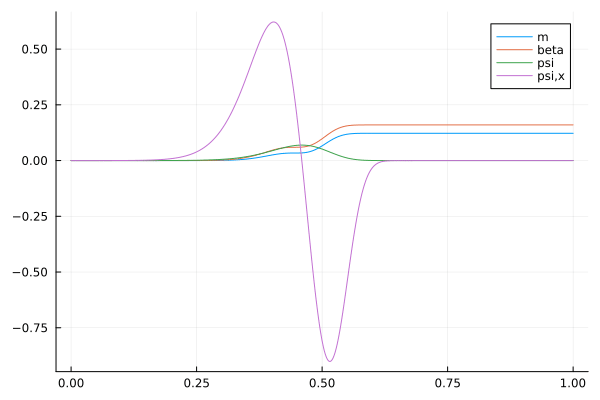

In [85]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 1:1:974#00:2:length(T)-1
    time_step=T[n+1]-T[n];
    IJulia.clear_output(true)
    functions3=DataFrame(CSV.File(dir*"/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
    d=round(T[n],digits=1)
    plot!(initX[4:L-3], [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"])#, xlim=[0.9 1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 15)

changing grid

In [1132]:
"using Interpolations
using ProgressMeter
@showprogress for k in 1:length(T)

    #evolve grid
    X=update_grid(state_array,dx,T,k,spl_funcs)
    state_array[:,5]=X
    L=length(X)
    X1=X[4:L-3]
    
    #evolve psi,x
    state_array=rungekutta4molstep(SF_RHS,state_array,T,k,0,spl_funcs) #evolve psi,x
    state_array=ghost(state_array,X)
    
    X=state_array[:,5]
    X1=X[4:L-3]
    
    spl_derpsi = scipyinterpolate.splrep(X[4:L-3], state_array[4:L-3,4],k=4)
    derpsi_func(x) = scipyinterpolate.splev(x, spl_derpsi)
    spl_funcs[4] = derpsi_func
    
    #calculate psi form psi,x
    psi0=0
    SFconstraint_psi(psi0,x) = derpsi_func(x)
    state_array[4:L-3,3] = rungekutta4(SFconstraint_psi,psi0,X1)
    state_array=ghost(state_array,X);
    
    spl_psi = scipyinterpolate.splrep(X[4:L-3], state_array[4:L-3,3],k=4)
    psi_func(x) = scipyinterpolate.splev(x, spl_psi)
    spl_funcs[3] = psi_func
    
    #evolve beta
    beta0=0
    state_array[4:L-3,2]=rk4wrapper(SFconstraint_beta,beta0,X1,T,spl_funcs)
    state_array=ghost(state_array,X)
    
    spl_beta = scipyinterpolate.splrep(X[4:L-3], state_array[4:L-3,2],k=4)
    beta_func(x) = scipyinterpolate.splev(x, spl_beta)
    spl_funcs[2] = beta_func
    
    #evolve m
    m0=0
    state_array[4:L-3,1]=m_rk4wrapper(SFconstraint_m,m0,X1,T,spl_funcs)
    state_array=ghost(state_array,X)
    
    spl_m = scipyinterpolate.splrep(X[4:L-3], state_array[4:L-3,1],k=4)
    m_func(x) = scipyinterpolate.splev(x, spl_m)
    spl_funcs[1] = m_func
    
    CSV.write(dir*"/time_step$k.csv", Tables.table(state_array), writeheader=false)
end"

LoadError: LoadError: UndefVarError: k not defined
in expression starting at In[1132]:50

In [1023]:
print(dir)

/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res2

In [391]:
"""#monitor_ratio = 1-v/rexp(-2beta)
monitor_ratio = zeros(L)
for i in 1:L
    monitor_ratio[i] = 2*state_array[i,1]/initX[i]*(1-initX[i])
    if monitor_ratio[i]>0.6
        print(monitor_ratio[i])
    end
end"""